# ML PROJECT : CUSTOMER CHURN PREDICTION IN TELECOM SECTOR

# General presentation:

- **What is customer churn** :

  Customer churn, a critical issue in the telecommunications industry, refers to the phenomenon where customers discontinue using a company's services and switch to competitors. It directly impacts profitability, market share, and brand loyalty.
- **Significance of Customer Churn in Telecom**
    - Revenue Loss: Churn results in immediate revenue loss and increases costs for acquiring new customers, which is typically five times higher than retaining existing ones​
    - Competitive Pressure: The telecom market is highly saturated, with multiple providers offering similar services. Dissatisfied customers can easily switch​
    - Customer Retention: Retaining existing customers is more economical and contributes to long-term profitability, as loyal customers tend to generate higher revenue​
- **Method to use: CRISP-DM methodology :**
  1. Business Understanding :
      - Understanding the project's business and specific objectives. State of the art.
      - Drafting the BO (s).
      - Convert BO(s) to DSO(s).
  2. Data Understanding : Explore data and understand its quality and relevance.
  3. Data Preparation : Clean, transform and prepare data for analysis. For each BO prepared, a data set.
  4. Modeling : Generate predictive models or algorithms using the data prepared for each BO.
  5. Evaluation : Evaluate the performance of the models generated in relation to the project objectives.
  6. Deployment : Deploy models in a production or user environment. Present final decision-making solutions.

# 1. Business Understanding

### 1.1 Business Context

Customer churn is a significant challenge in the telecommunications industry. Losing customers directly impacts revenue, market share, and operational efficiency. The goal is to identify customers at risk of churning and implement strategies to retain them. By using machine learning, telecom companies can predict churn and and gain useful insights to address it.

- BO1: Improve customer retention by addressing their needs and concerns.
- BO2: Retain customers by reducing churn risks through data-driven decisions.
- BO3: Identify customers likely to leave the company.



- DSO1: Analyze key factors influencing churn to enable targeted retention strategies
- DSO2:predict churn and provide insights for effective retention strategies.
- DS03: predict customer churn.

# 2. Data Understanding

In [1]:
#!pip install lifelines
#!pip install shap
#!pip install flask joblib

In [2]:
#!pip install --upgrade scikit-learn
#!pip install scikit-learn==1.3.0
#!pip install --upgrade imbalanced-learn
#!pip show scikit-learn imbalanced-learn


In [3]:
#Imports :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from scipy.optimize import minimize
#Imports for encoding categorical features
from sklearn.preprocessing import LabelEncoder
#Imports for splitting
from sklearn.model_selection import train_test_split
#Imports for Standarization
from sklearn.preprocessing import StandardScaler
#Imports for Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
#Imports for Modeling
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.stats import mode
import xgboost as xgb
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
#Imports of hyperparameters
from sklearn.model_selection import GridSearchCV
#Imports for evaluation
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix ,ConfusionMatrixDisplay ,roc_curve, auc ,precision_score , recall_score,f1_score, roc_auc_score, precision_recall_curve
#Imports for deployment
#from google.colab import files
import joblib
from joblib import dump, load
from flask import Flask, request, jsonify
from PIL import Image

C:\Users\salma\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
#Importing data from drive :
#from google.colab import drive
#drive.mount('/content/drive')

### 2.1 Overview of the Datasets

In [5]:
#df_train= pd.read_csv('/content/drive/MyDrive/Ml project 4DS4 /churn-bigml-80.csv')
#df_test= pd.read_csv('/content/drive/MyDrive/Ml project 4DS4 /churn-bigml-20.csv')

In [6]:
import pandas as pd

file_train = "C:/Users/salma/Downloads/churn-bigml-80.csv"
file_test = "C:/Users/salma/Downloads/churn-bigml-20.csv"

df_train= pd.read_csv(file_train)
df_test= pd.read_csv(file_test)

In [7]:
# Concatenate the two datasets
df = pd.concat([df_train, df_test], ignore_index=True)

####2.1.1 Overiew of the test dataset

In [8]:
df.head(6)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [9]:
df.tail(6)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3327,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3332,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
print("Number of customers:", df.shape[0])
print("\nNumber of features:", df.shape[1])
print("\nFeatures list and types:")
print(df.info())
print("\nMissing values:", df.isnull().sum().sum())
print("\nNumber of duplicates:", df.duplicated().sum())
print("\nUnique values:")
print(df.nunique())

Number of customers: 3333

Number of features: 20

Features list and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls

### 2.1.2 Data Overview Report

** The dataset contains information about customers of a telecommunications company, including indicators of their usage patterns and account details. The primary goal is to understand why customers churn (leave the company) and to predict whether a customer is likely to churn.


** The datasets have the following features:

- **State:** (string) : The customer’s state of residence, represented by abbreviations
- **Account length:** (integer) The length of the customer’s subscription (in days).
- **Area code:** (integer) The regional area code associated with the customer.
- **International plan:**(string) Indicates whether the customer has an international calling plan (Yes/No).
- **Voice mail plan:** (string) Indicates whether the customer has a voicemail plan (Yes/No).
- **Number vmail messages:**(integer)  Number of voicemail messages the customer has received.
- **Total day minutes:**(double) Total number of call minutes during the day.
- **Total day calls:**(integer) Total number of calls made during the day.
- **Total day charge:** (double) Total cost of calls during the day.
- **Total eve minutes:** (double) Total number of call minutes during the evening.
- **Total eve calls:**(integer) Total number of calls made during the evening.
- **Total eve charge:** (double) Total cost of calls during the evening.
- **Total night minutes:** (double) Total number of call minutes during the night.
- **Total night calls:** (integer)Total number of calls made during the night.
- **Total night charge:** (double)Total cost of calls during the night.
- **Total intl minutes:** (double) Total number of international call minutes.
- **Total intl calls:** (integer) Total number of international calls.
- **Total intl charge:** (double) Total cost of international calls.
- **Customer service calls:** (integer) Number of calls made to customer service.
- **Churn:** (string) Indicates whether the customer has left the company (True = Churn, False = Non-Churn).

**-->The "Churn" column is the target to predict.**

**-->The Area code has only three uniques values : it can be considerate as a categorical feature**

- There are 3 columns with object data type, which typically means they contain strings or mixed data types
- There are 8 columns with integer numeric data (int64)
- There are 8 columns with floating-point numeric data (float64)
- There is 1 column with boolean data (bool)


- Both the training and test datasets are complete, containing no missing values or duplicate


**categorial columns and numerical colunmns**

In [11]:
#categorial columns and numerical colunmns

categorical_columns = df_train.select_dtypes(include=['object','bool']).columns
#adding the Area code feature to the categorical_columns
categorical_columns = np.append(categorical_columns, 'Area code')

numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
#droping the Area code feature to the numrical_columns
numerical_columns = np.delete(numerical_columns, np.where(numerical_columns == 'Area code'))

print("Categorical columns:", categorical_columns)
print("\nNumerical columns:", numerical_columns)

Categorical columns: ['State' 'International plan' 'Voice mail plan' 'Churn' 'Area code']

Numerical columns: Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')


### 2.2 Data Visualization

from here we will check:
 - Check for Outliers
 - Explore Data range and distribution
 - correlation matrix
 - Explore categorical variables

#### 2.2.1 Check for Outliers

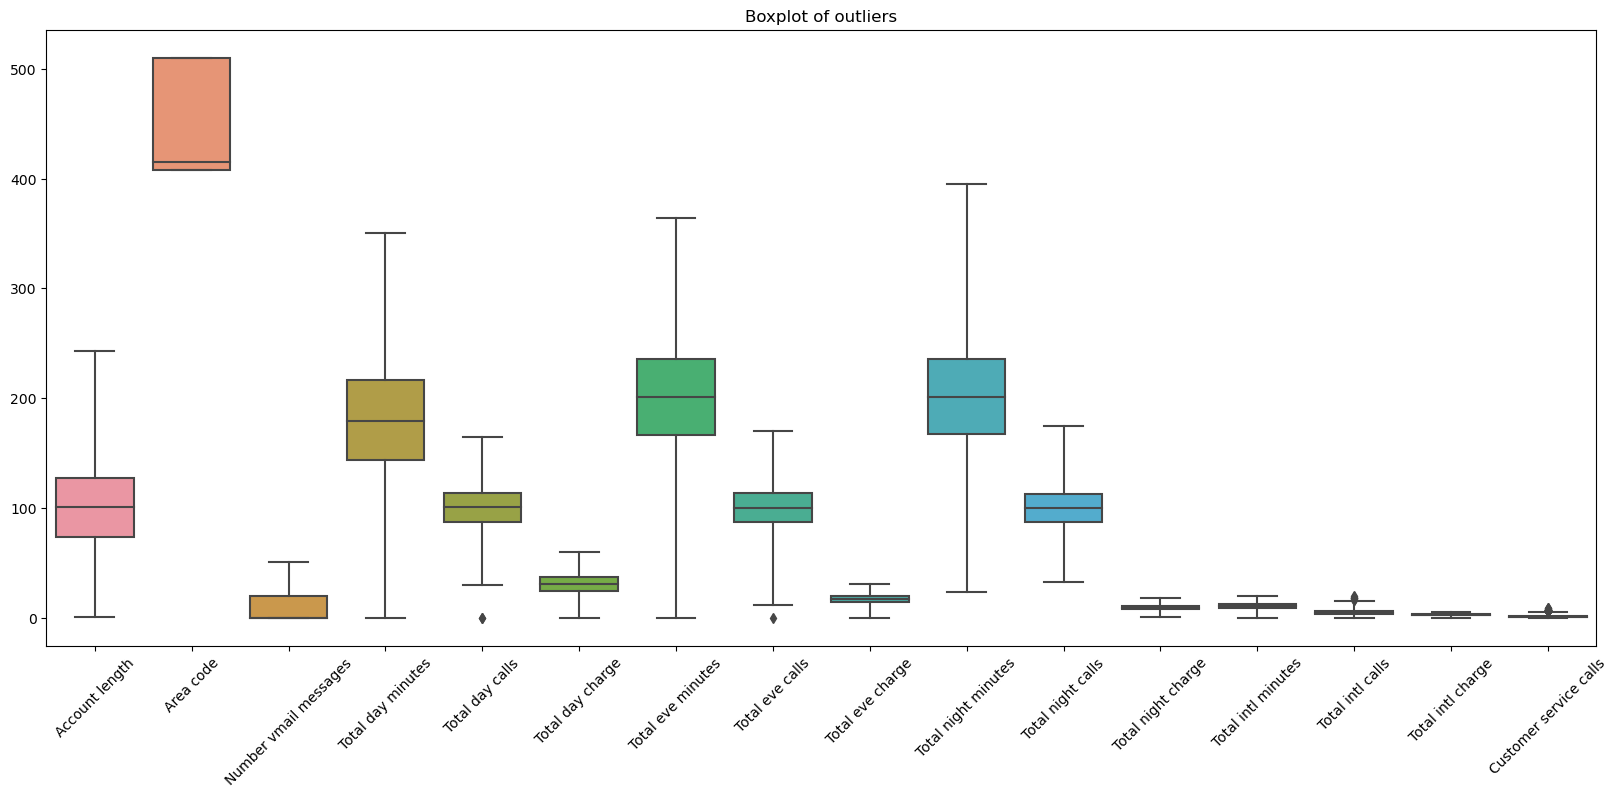

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df.drop(columns=['Churn']), whis=3)
plt.title("Boxplot of outliers")
plt.xticks(rotation=45)

plt.show()

In [13]:
# Detection of the outliers
def detect_outliers_iqr(data, multiplier=3):
    outliers_count = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Identify the outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        # Store the number of outliers
        outliers_count[column] = len(outliers)

    return outliers_count
outliers=detect_outliers_iqr(df)
print("Number of outliers for each column:")
for column, count in outliers.items():
  print(f"{column}: {count}")
print("\nTotal number of outliers:", sum(outliers.values()))

Number of outliers for each column:
Account length: 0
Area code: 0
Number vmail messages: 0
Total day minutes: 0
Total day calls: 2
Total day charge: 0
Total eve minutes: 0
Total eve calls: 1
Total eve charge: 0
Total night minutes: 0
Total night calls: 0
Total night charge: 0
Total intl minutes: 0
Total intl calls: 8
Total intl charge: 0
Customer service calls: 35

Total number of outliers: 46


**-->** columns with outliers are: Total eve calls , Total day calls , Total intl calls and Customer service calls

**-->** For the test data the outliers in the area code feature are not actually outliers since it's considerated as categorial feature

#### 2.2.2 Explore Data range and distribution

In [14]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



- Count: Shows the number of non-null values in each column.
- Mean: Represents the average value of each column.
- Std (Standard Deviation): Indicates the spread or dispersion of the values around the mean.
- Min and Max: Display the minimum and maximum values in each column.
- 25th, 50th (Median), and 75th Percentiles: Provide quartile information, indicating how the data is distributed in terms of percentiles

- count shows 125972 for all raws which say that nearly there's no missing value.
- mean: the average value of each column. For instance, 'duration' seems to have an average of 287.15, 'flag' has a mean of around 0.02,etc (high range)
- std: Indicates the variability or spread of values within each column. Higher standard deviations imply more spread out data, Like 'duration'.

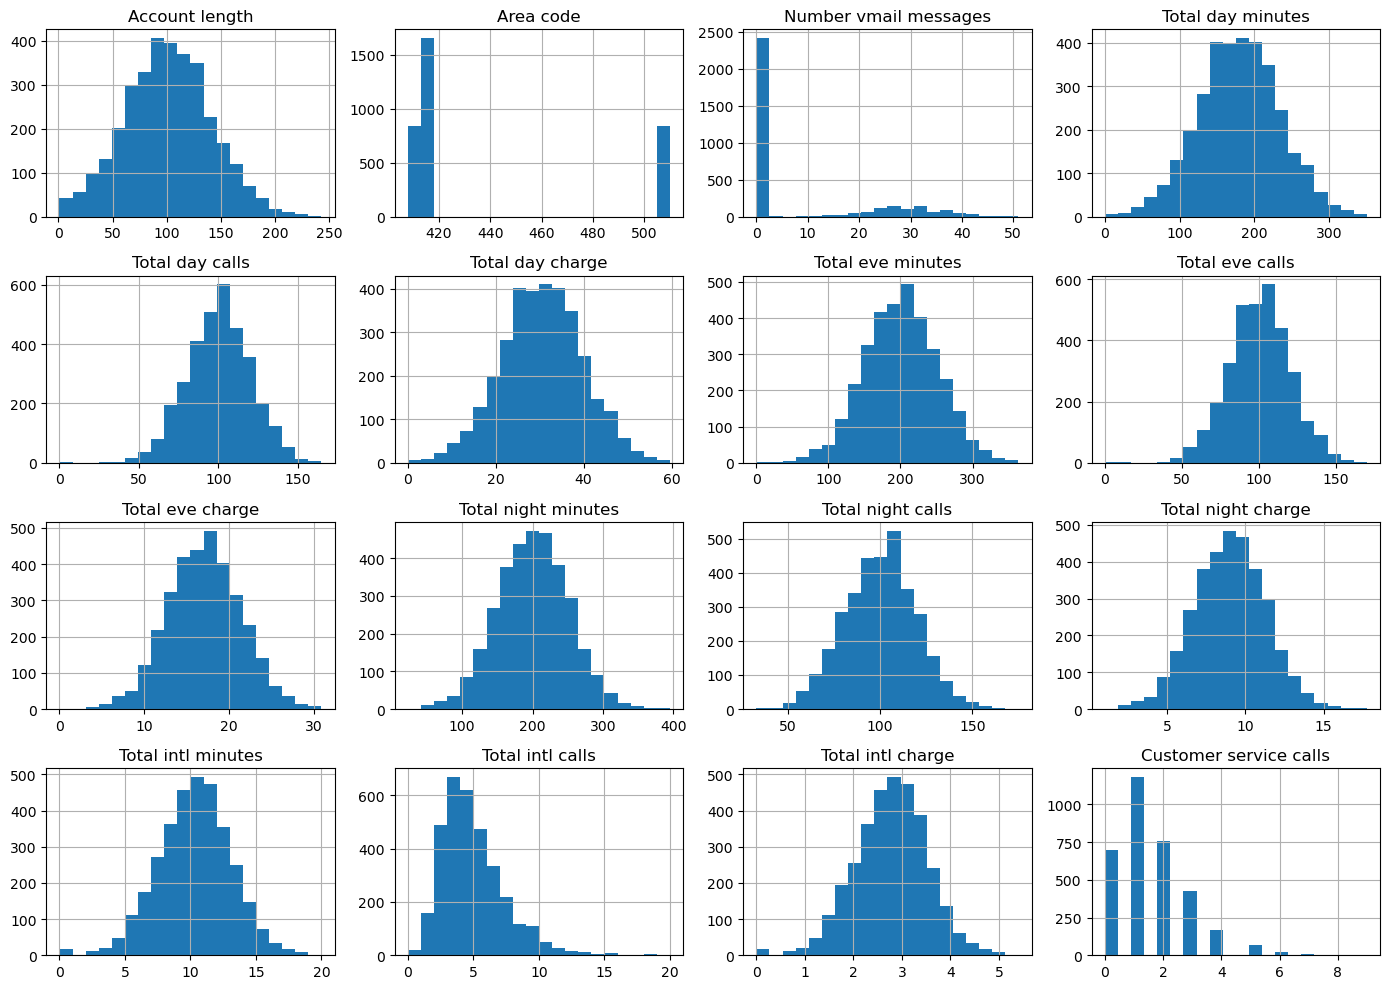

In [15]:
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


-  The plot of area codes feature shows that area codes are more like categories than continuous numbers
- Distribution of Number vmail messages is heavily skewed to the right, with most customers receiving very few or no voicemail messages.
- The distributions of charges closely follow the distributions of minutes, indicating that charges are directly calculated based on call duration. Similarly, the number of calls shows a consistent pattern across day, evening, and night, aligning with the usage trends of minutes and charges.

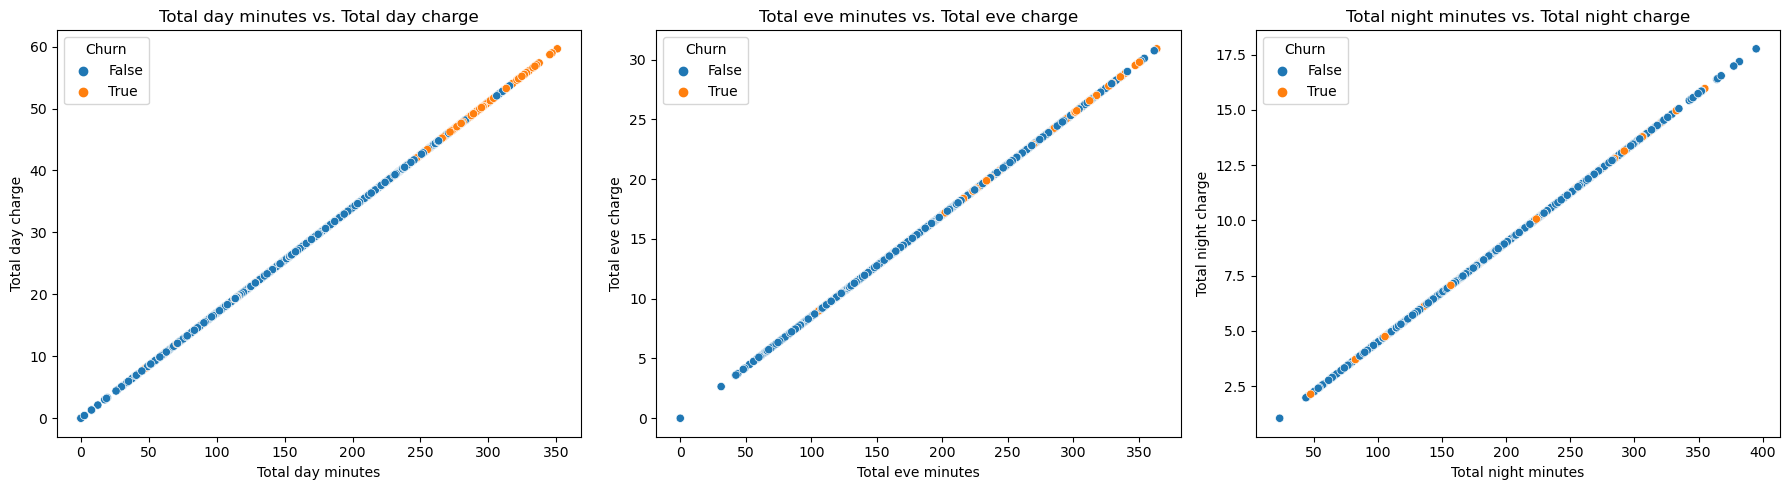

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Plot 1: Total day minutes vs. Total day charge
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df, ax=axes[0])
axes[0].set_title("Total day minutes vs. Total day charge")
# Plot 2: Total eve minutes vs. Total eve charge
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df, ax=axes[1])
axes[1].set_title("Total eve minutes vs. Total eve charge")
# Plot 3: Total night minutes vs. Total night charge
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df, ax=axes[2])
axes[2].set_title("Total night minutes vs. Total night charge")
plt.tight_layout()
plt.show()

**-->** Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers

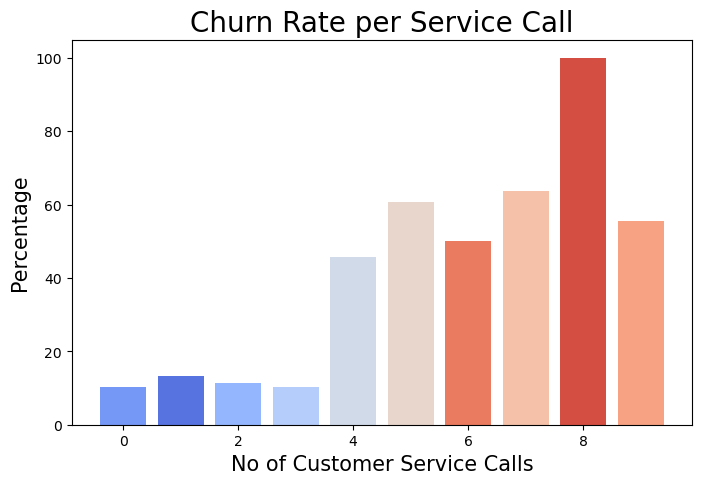

In [17]:
plt.rcParams['figure.figsize'] = (8, 5)
s1 = list(df['Customer service calls'].unique())
s2 = list(df.groupby(['Customer service calls'])['Churn'].mean() * 100)
colors = sns.color_palette("coolwarm", n_colors=len(s1))
plt.bar(s1, s2, color=colors)
plt.title("Churn Rate per Service Call", fontsize=20)
plt.xlabel('No of Customer Service Calls', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()

**-->** The costumers with higher number of customer service calls are more likely to churn



#### 2.2.3 Correlation matrix

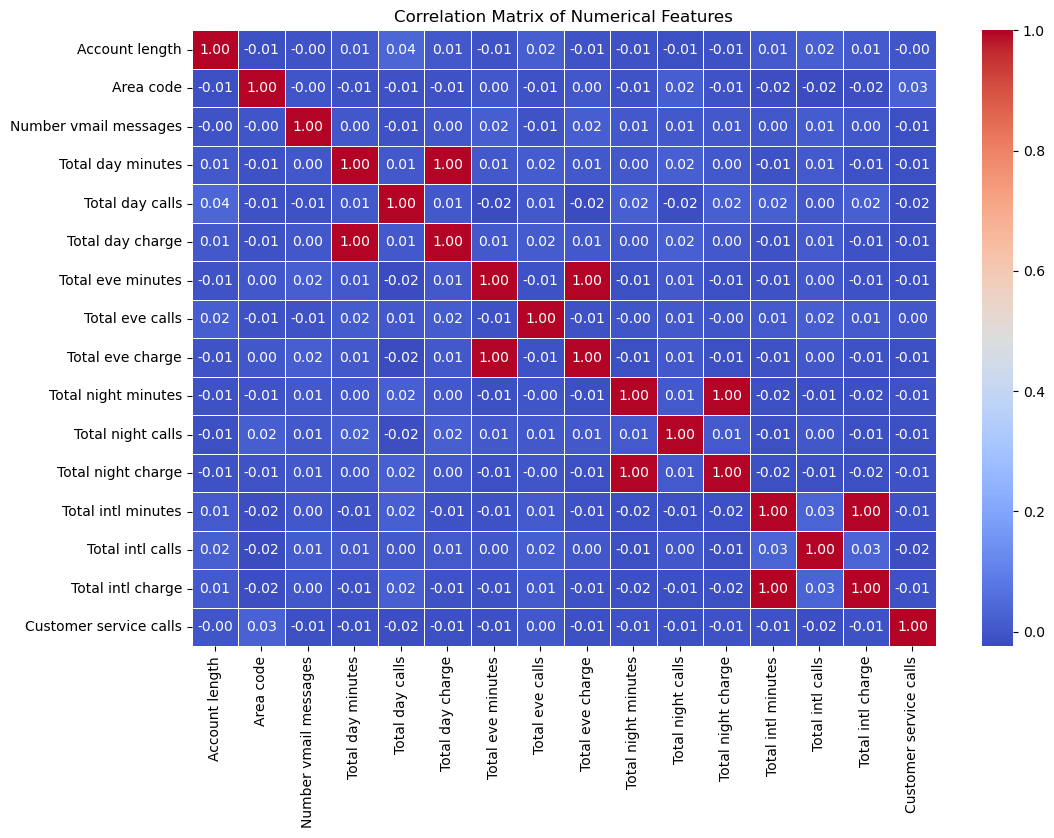

In [18]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The features Total day (eve / night /intl) minutes and Total day (eve / night / intl) charge have a perfect correlation (1.00), indicating that one is directly derived from the other; including both in a model may introduce redundancy.

#### 2.2.4 Explore categorical variables

In [19]:
# Check unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique().tolist())
    print('-' * 50)

Unique values in State:
['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH', 'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA', 'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS', 'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT']
--------------------------------------------------
Unique values in International plan:
['No', 'Yes']
--------------------------------------------------
Unique values in Voice mail plan:
['Yes', 'No']
--------------------------------------------------
Unique values in Churn:
[False, True]
--------------------------------------------------
Unique values in Area code:
[415, 408, 510]
--------------------------------------------------


In [20]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

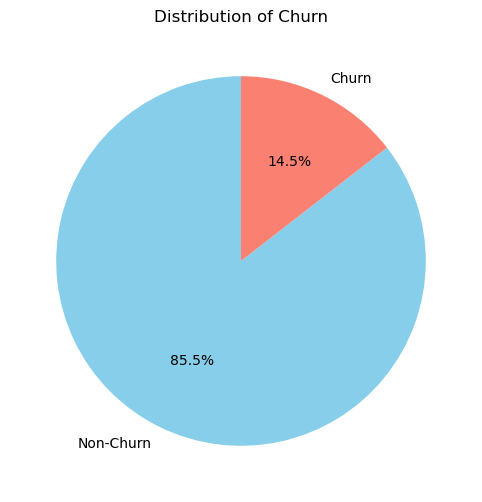

In [21]:
# Count the distribution of churn (True/False)
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    labels=['Non-Churn', 'Churn'],
)
plt.title('Distribution of Churn')
plt.ylabel('')
plt.show()

In [22]:
state_churn_distribution = df.groupby(['State', 'Churn']).size().reset_index(name='Count')
total_customers_by_state = df.groupby('State').size().reset_index(name='Total_Customers')
state_churn_distribution = state_churn_distribution.merge(total_customers_by_state, on='State')
state_churn_distribution['Percentage'] = (
    state_churn_distribution['Count'] / state_churn_distribution['Total_Customers']
) * 100
state_churn_table = state_churn_distribution.pivot(
    index='State',
    columns='Churn',
    values='Percentage'
).reset_index()
state_churn_table.rename(columns={0: 'Non_Churned (%)', 1: 'Churned (%)'}, inplace=True)
print('the percentage of churned and non_churned costumers by state:')
print(state_churn_table.sort_values(by='Churned (%)', ascending=False))


the percentage of churned and non_churned costumers by state:
Churn State  Non_Churned (%)  Churned (%)
31       NJ        73.529412    26.470588
4        CA        73.529412    26.470588
43       TX        75.000000    25.000000
20       MD        75.714286    24.285714
40       SC        76.666667    23.333333
22       MI        78.082192    21.917808
25       MS        78.461538    21.538462
33       NV        78.787879    21.212121
47       WA        78.787879    21.212121
21       ME        79.032258    20.967742
26       MT        79.411765    20.588235
2        AR        80.000000    20.000000
16       KS        81.428571    18.571429
34       NY        81.927711    18.072289
23       MN        82.142857    17.857143
38       PA        82.222222    17.777778
19       MA        83.076923    16.923077
6        CT        83.783784    16.216216
27       NC        83.823529    16.176471
30       NH        83.928571    16.071429
10       GA        85.185185    14.814815
8        DE   

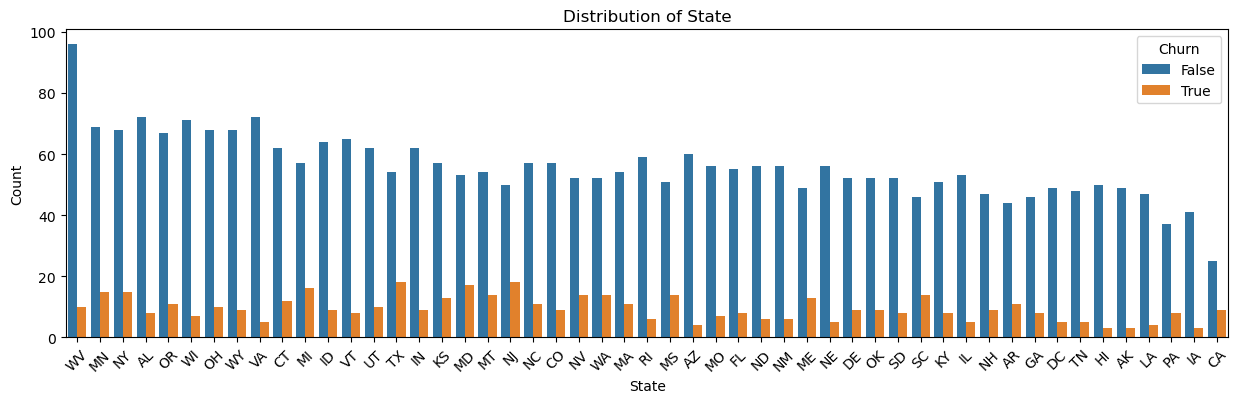

In [23]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index ,hue='Churn')
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
categorical_columns2 = ['International plan', 'Voice mail plan','Area code']
for column in categorical_columns2:
  churn_distribution = df.groupby([column , 'Churn']).size().reset_index(name='Count')
  total_customers_by_state = df.groupby(column).size().reset_index(name='Total_Customers')
  churn_distribution = churn_distribution.merge(total_customers_by_state, on=column)
  churn_distribution['Percentage'] = (churn_distribution['Count'] / churn_distribution['Total_Customers']) * 100
  churn_table = churn_distribution.pivot(
    index= column ,
    columns='Churn',
    values='Percentage'
  ).reset_index()
  churn_table.rename(columns={0: 'Non_Churned (%)', 1: 'Churned (%)'}, inplace=True)
  print('the percentage of churned and non_churned costumers by :' ,column)
  print(churn_table.sort_values(by='Churned (%)', ascending=False))
  print('-' * 50 )

the percentage of churned and non_churned costumers by : International plan
Churn International plan  Non_Churned (%)  Churned (%)
1                    Yes        57.585139    42.414861
0                     No        88.504983    11.495017
--------------------------------------------------
the percentage of churned and non_churned costumers by : Voice mail plan
Churn Voice mail plan  Non_Churned (%)  Churned (%)
0                  No        83.284944    16.715056
1                 Yes        91.323210     8.676790
--------------------------------------------------
the percentage of churned and non_churned costumers by : Area code
Churn  Area code  Non_Churned (%)  Churned (%)
2            510        85.119048    14.880952
0            408        85.441527    14.558473
1            415        85.740181    14.259819
--------------------------------------------------


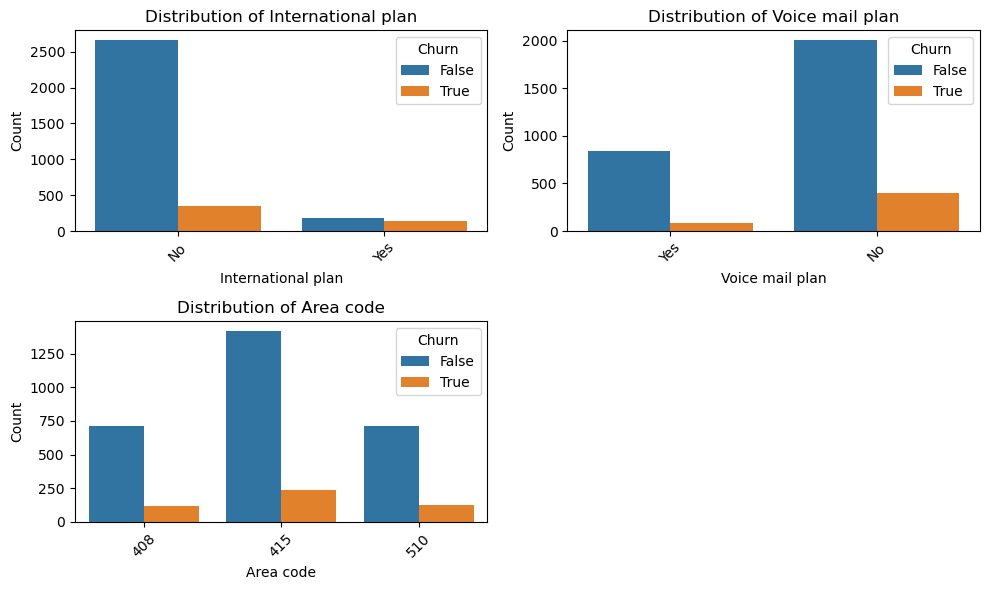

In [25]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(categorical_columns2, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column,hue='Churn')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**-->** International Plan: A positive relationship exists between having the plan and churn likelihood. Customers with the international plan churn at a higher rate.

**-->** The distribution of the Area code is almost equal for the three values same for the percentage of the churned and retained costumers per area code

# 3. Data Preparation

copie for data set for data preparation

In [26]:
#creating a copie for data set for feature engineering
df_dp = df.copy()

#### 3.1 Handling Outliers

- Outliers were identified in variables such as Total eve calls and Total intl calls which are capped using the Interquartile Range (IQR) method.

In [27]:
columns_outliers=['Total eve calls' , 'Total day calls' , 'Total intl calls']
for column in columns_outliers:
    Q1 = df_dp[column].quantile(0.25)
    Q3 = df_dp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    # Capping the outliers at the upper and lower bounds
    df_dp[column] = df_dp[column].clip(lower=lower_bound, upper=upper_bound)

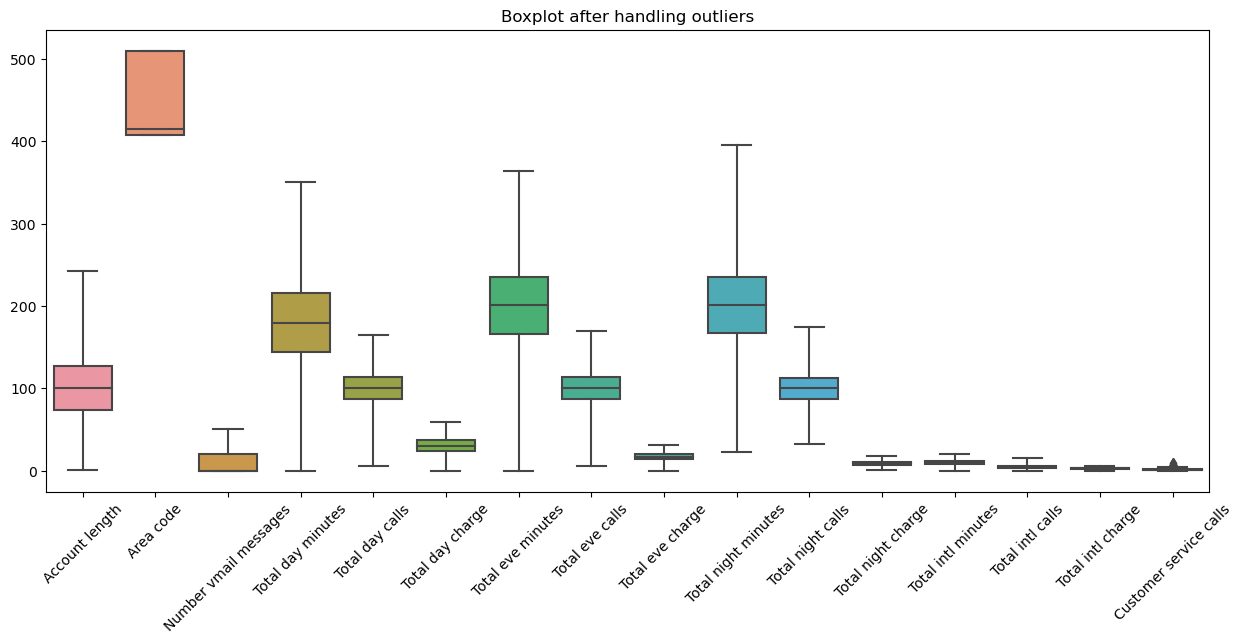

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_dp.drop(columns=['Churn']), whis=3)
plt.title("Boxplot after handling outliers")
plt.xticks(rotation=45)
plt.show()

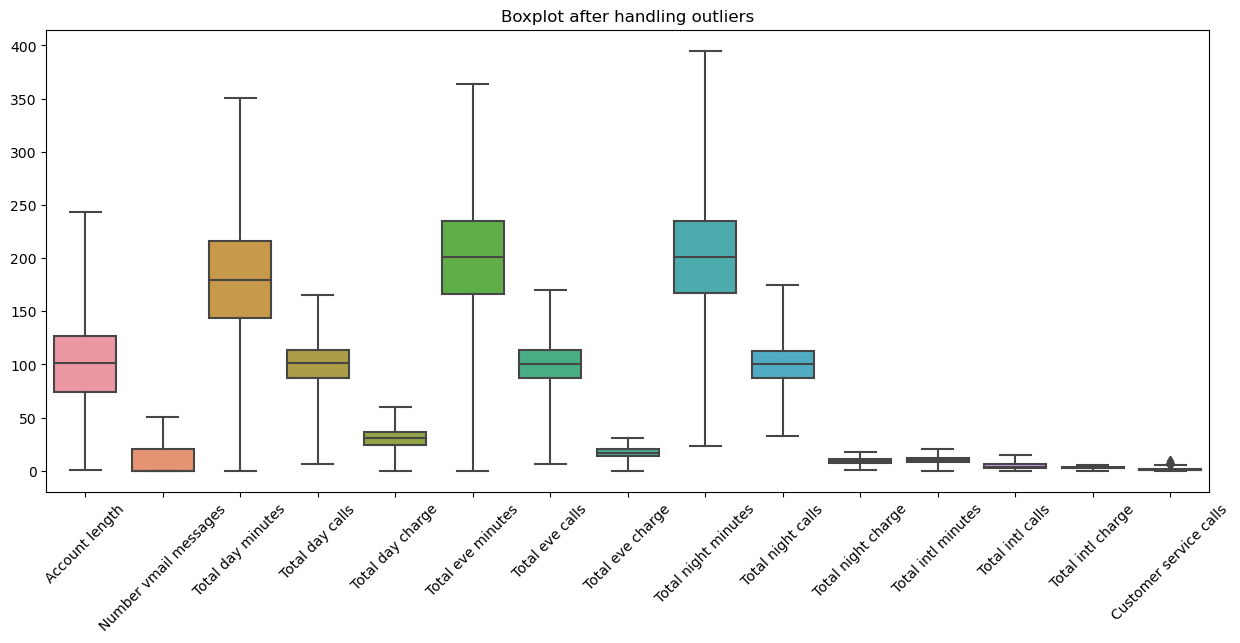

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_dp.drop(columns=['Churn','Area code']), whis=3)
plt.title("Boxplot after handling outliers")
plt.xticks(rotation=45)
plt.show()

- Outliers were handled to prevent them from skewing model results, ensuring more accurate predictions.

#### 3.2  Encoding Categorical Variables

Label Encoding: For binary categorical variables (International plan ,Voice mail plan , state and churn )

In [30]:
label_encoder = LabelEncoder()
df_dp['International plan'] = label_encoder.fit_transform(df_dp['International plan'])
df_dp['Voice mail plan'] = label_encoder.fit_transform(df_dp['Voice mail plan'])
df_dp['Churn'] = label_encoder.fit_transform(df_dp['Churn'])

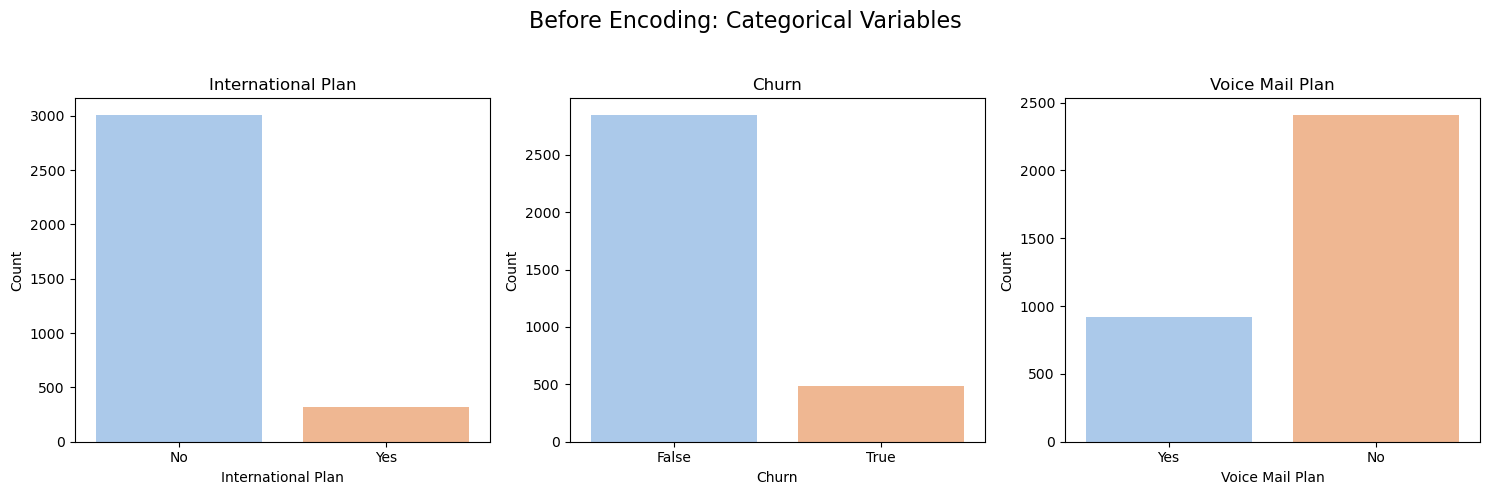

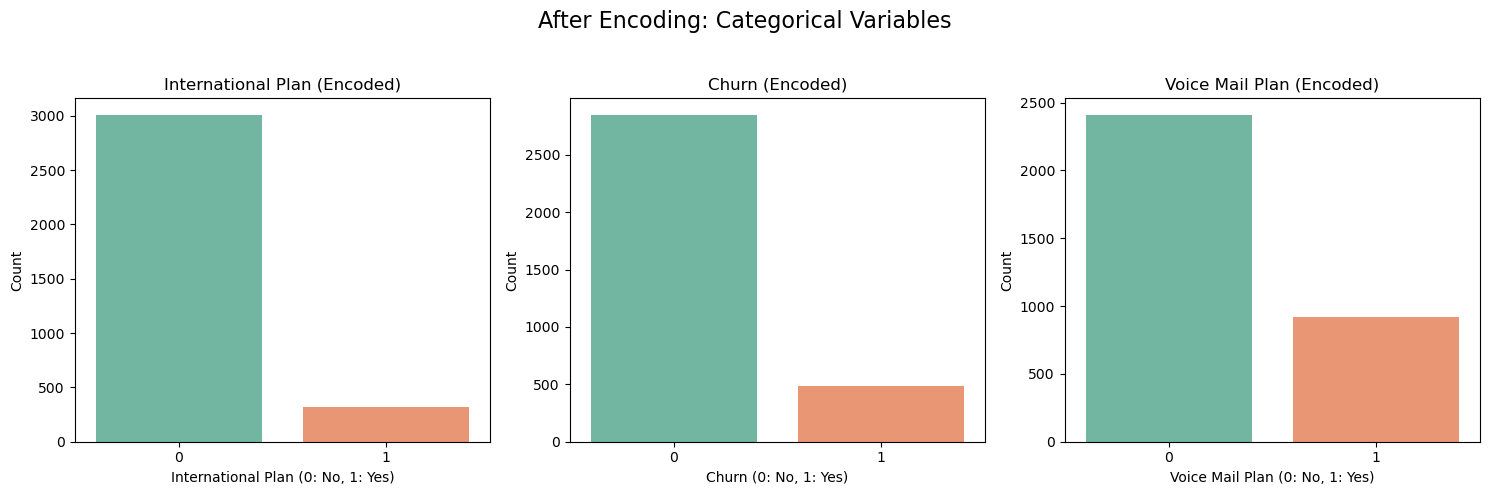

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before Encoding: Plot the original categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Before Encoding: Categorical Variables", fontsize=16)

sns.countplot(x='International plan', data=df, ax=axes[0], palette="pastel")
axes[0].set_title("International Plan")
axes[0].set_xlabel("International Plan")
axes[0].set_ylabel("Count")

sns.countplot(x='Churn', data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Churn")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

sns.countplot(x='Voice mail plan', data=df, ax=axes[2], palette="pastel")
axes[2].set_title("Voice Mail Plan")
axes[2].set_xlabel("Voice Mail Plan")
axes[2].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
plt.show()

# After Encoding: Create encoded versions
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoder = LabelEncoder()

for col in ['International plan', 'Churn', 'Voice mail plan']:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Plot the encoded variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("After Encoding: Categorical Variables", fontsize=16)

sns.countplot(x='International plan', data=df_encoded, ax=axes[0], palette="Set2")
axes[0].set_title("International Plan (Encoded)")
axes[0].set_xlabel("International Plan (0: No, 1: Yes)")
axes[0].set_ylabel("Count")

sns.countplot(x='Churn', data=df_encoded, ax=axes[1], palette="Set2")
axes[1].set_title("Churn (Encoded)")
axes[1].set_xlabel("Churn (0: No, 1: Yes)")
axes[1].set_ylabel("Count")

sns.countplot(x='Voice mail plan', data=df_encoded, ax=axes[2], palette="Set2")
axes[2].set_title("Voice Mail Plan (Encoded)")
axes[2].set_xlabel("Voice Mail Plan (0: No, 1: Yes)")
axes[2].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
plt.show()


--> Categorical variables like International plan, Voice mail plan, and Churn were encoded using Label Encoding, converting "Yes" and "No" into 1 and 0 for machine learning use.

In [32]:
state_churn_rate = df_dp.groupby('State')['Churn'].mean().reset_index()
state_churn_rate.rename(columns={'Churn': 'Churn_Rate'}, inplace=True)
X = state_churn_rate[['Churn_Rate']].values
kmeans = KMeans(n_clusters=3, random_state=42)
state_churn_rate['Cluster'] = kmeans.fit_predict(X)
cluster_mapping = (
    state_churn_rate.groupby('Cluster')['Churn_Rate']
    .mean()
    .sort_values()
    .index.to_list()
)
cluster_labels = {cluster_mapping[0]: 'Low', cluster_mapping[1]: 'Medium', cluster_mapping[2]: 'High'}
state_churn_rate['State_Category'] = state_churn_rate['Cluster'].map(cluster_labels)

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\salma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\salma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

-
K-means clustering grouped states by churn rates, creating a new feature, State_Category, which highlights regional churn trends and improves model performance.

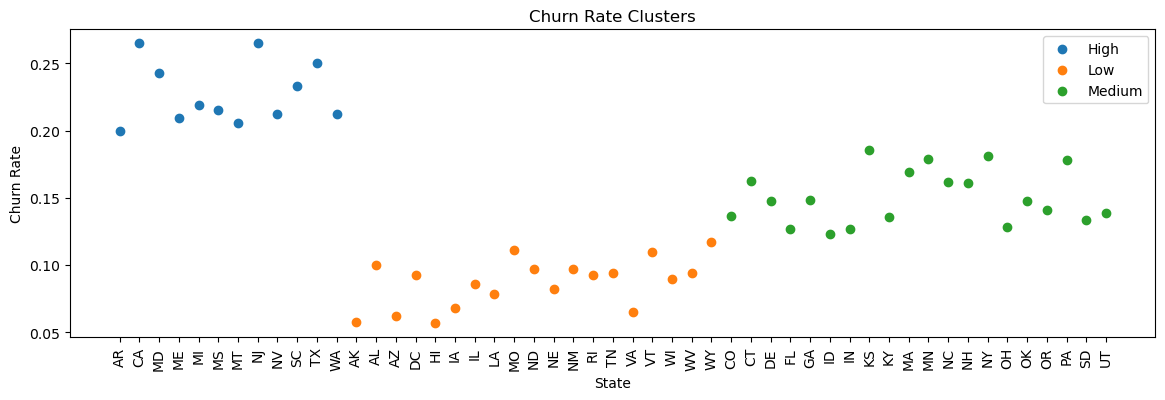

In [33]:
plt.figure(figsize=(14, 4))
for category, group in state_churn_rate.groupby('State_Category'):
    plt.scatter(group['State'], group['Churn_Rate'], label=category)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Clusters')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [34]:
# Custom label encoding for State_Category
custom_encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df_dp = df_dp.merge(state_churn_rate[['State', 'State_Category']], on='State', how='left')
df_dp['State_Category'] = df_dp['State_Category'].map(custom_encoding)

- The regional "State" feature was encoded into numerical categories, and K-means clustering grouped states by churn rate, assigning each state a category (Low, Medium, High).

In [35]:
state_stats = df_dp.groupby('State_Category').agg(
    Num_Customers=('Churn', 'size'),
    Churn_Rate=('Churn', 'mean')
).reset_index()
print(state_stats)

   State_Category  Num_Customers  Churn_Rate
0               0           1233    0.088402
1               1           1341    0.150634
2               2            759    0.226614



--> The result shows that Category 0 (Low churn) has the most customers with a low churn rate, while Category 2 (High churn) has fewer customers but a higher churn rate, indicating a need for targeted retention in high-churn states.

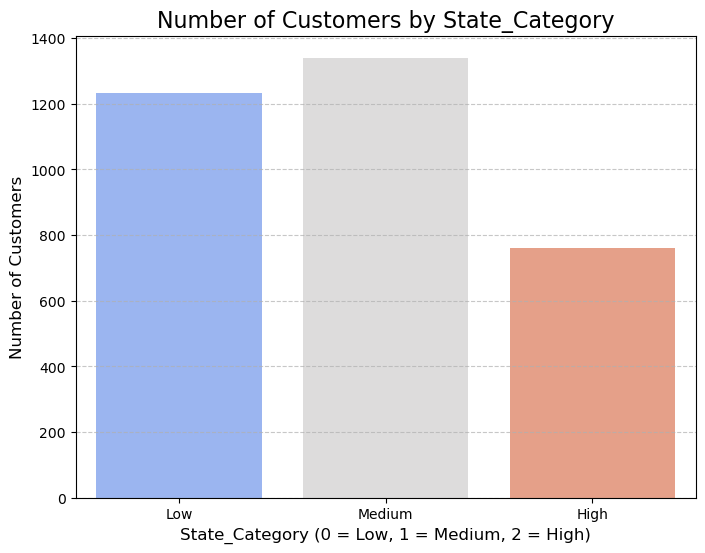

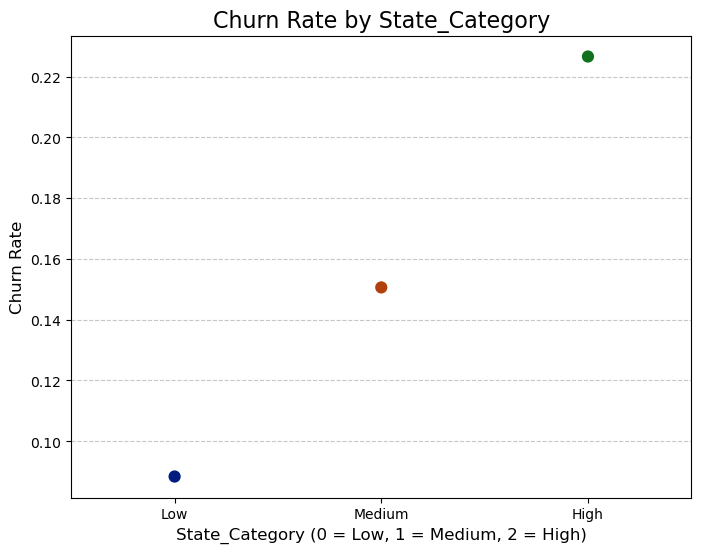

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='State_Category',
    y='Num_Customers',
    data=state_stats,
    palette='coolwarm',
    order=[0, 1, 2]
)
plt.title('Number of Customers by State_Category', fontsize=16)
plt.xlabel('State_Category (0 = Low, 1 = Medium, 2 = High)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line plot to show the Churn_Rate for each State_Category
plt.figure(figsize=(8, 6))
sns.pointplot(
    x='State_Category',
    y='Churn_Rate',
    data=state_stats,
    palette='dark',
    order=[0, 1, 2],
    markers='o',
    color='blue'
)
plt.title('Churn Rate by State_Category', fontsize=16)
plt.xlabel('State_Category (0 = Low, 1 = Medium, 2 = High)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
df_dp.drop(columns=['State'], inplace=True)

In [38]:
df_dp.head(6)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_Category
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,2
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0


#### 3.3 Droping insignificant columns

-
Dropping certain columns reduces overfitting and model complexity, making the model easier to interpret. It also helps prevent multicollinearity, where highly correlated features can interfere with the model’s decision-making.

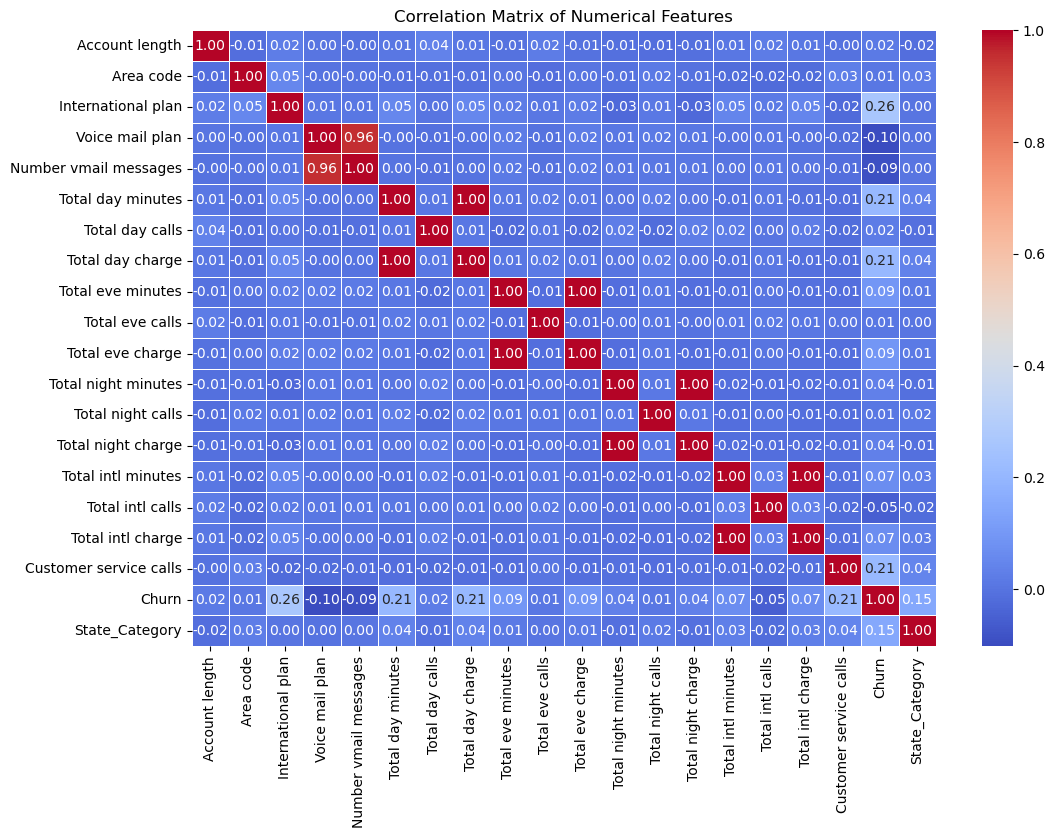

In [39]:
correlation_matrix = df_dp.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**-->** The Area Code feature does not seem to influence customer churn, as the correlation is effectively zero

In [40]:
#Dropping the Area code column
df_dp.drop(columns=['Area code'], inplace=True)

-
The Area Code feature was removed due to its minimal impact on churn prediction, as it had only three unique values and didn’t significantly improve model accuracy, helping to reduce complexity.

Text(0.5, 0, 'Number vmail messages')

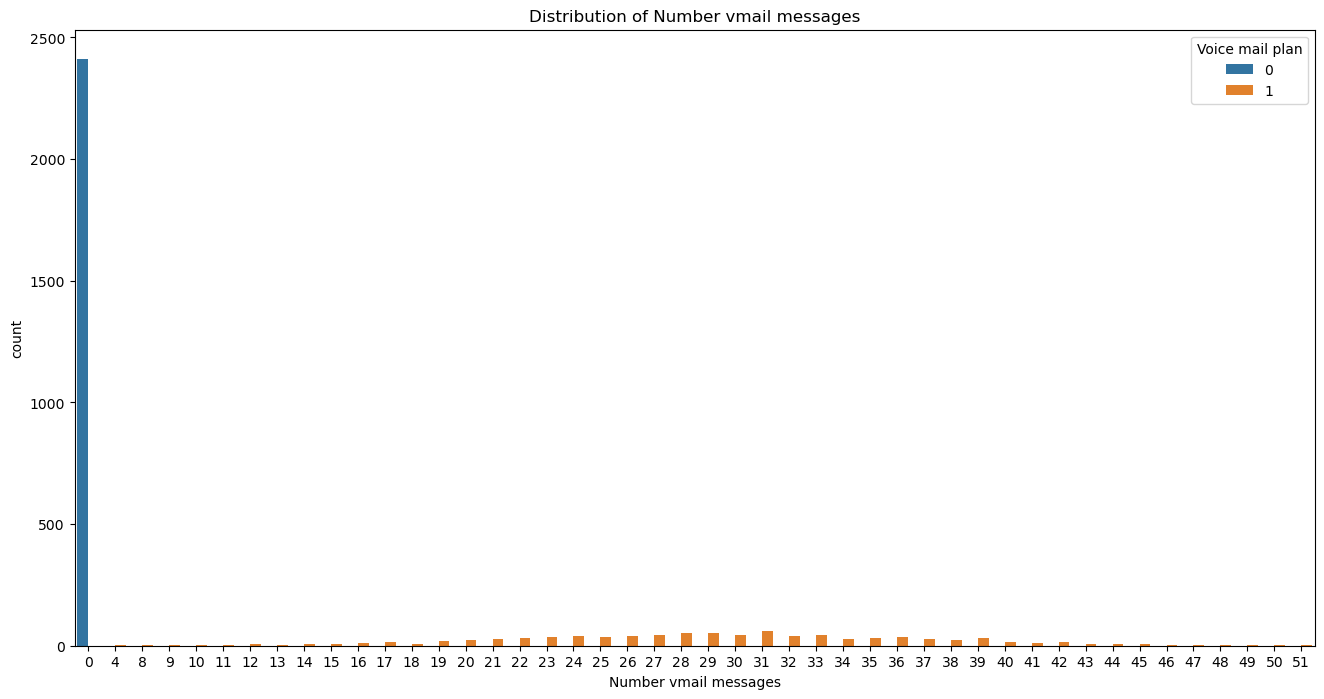

In [41]:
#chek the distribution of Number vmail messages according to the voice mail plan
plt.figure(figsize=(16, 8))
sns.countplot(data=df_dp, x='Number vmail messages', hue='Voice mail plan')
plt.title('Distribution of Number vmail messages')
plt.xlabel('Number vmail messages')

**-->** the plot reveals a clear resemblance between the feature 'voice mail plan' and the distribution of voicemail messages: clients with a voicemail plan (represented by '1') exhibit varying counts of voicemail messages, while those without a plan (represented by '0') consistently show zero voicemail messages

In [42]:
#dropping the number vmail messages
df_dp.drop(columns=['Voice mail plan'], inplace=True)

In [43]:
#Dropping columns that are mirrors of other columns (duplicate info)
df_dp.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], inplace=True)

- "'Total day minutes', 'Total eve minutes', 'Total night minutes', and 'Total intl minutes' were dropped as they are highly correlated with their respective charge features, making them redundant. This simplifies the model and focuses it on more relevant predictors of churn."

--> By removing these features, we maintain a simpler, more effective model that better captures the factors driving churn without including unnecessary or redundant information.

#### 3.4 Feature creation

**Creating Usage Score :** A composite feature called Usage Score was created by combining Total day charge, Total eve charge, Total night charge, and Total intl charge. Each charge type is weighted by its correlation with churn, and the resulting score captures a customer’s overall usage pattern, reflecting their engagement with the service.*texte en italique*


In [44]:
# Compute correlation with the target
corr_day = df_dp['Total day charge'].corr(df_dp['Churn'])
corr_eve = df_dp['Total eve charge'].corr(df_dp['Churn'])
corr_night = df_dp['Total night charge'].corr(df_dp['Churn'])
corr_intl =df_dp['Total intl charge'].corr(df_dp['Churn'])

# Normalize correlations to sum to 1
total_corr = abs(corr_day) + abs(corr_eve) + abs(corr_night) + abs(corr_intl)
weights = [abs(corr_day) / total_corr, abs(corr_eve) / total_corr, abs(corr_night) / total_corr , abs(corr_intl)/total_corr]

print(f"Dynamic Weights Based on Correlation: {weights}")

Dynamic Weights Based on Correlation: [0.5107178361386364, 0.23098861134323662, 0.08836533270880313, 0.16992821980932374]


- Weights were assigned dynamically based on the correlation of each feature with the target variable (Churn). This step ensures that the most relevant usage features contribute more significantly to the Usage Score.

In [45]:
df_dp['Usage Score'] = (
  df_dp['Total day charge'] * weights[0] +
  df_dp['Total eve charge'] * weights[1] +
  df_dp['Total night charge'] * weights[2] +
  df_dp['Total intl charge']* weights[3]
)

In [46]:
numerical_columns_n = df_dp.select_dtypes(include=['int64', 'float64']).columns

# Drop columns only if they exist in `numerical_columns_n`
columns_to_drop = ['State_Category', 'International plan']
numerical_columns_n = numerical_columns_n.drop([col for col in columns_to_drop if col in numerical_columns_n])

categorical_columns_n = df_dp.drop(columns=numerical_columns_n).columns
numerical_columns_n = numerical_columns_n.drop(['Churn'])  # Drop 'Churn' if it exists


In [47]:
print(numerical_columns_n)
print(categorical_columns_n)

Index(['Account length', 'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Usage Score'],
      dtype='object')
Index(['International plan', 'State_Category'], dtype='object')


--> **Why Create Usage Score?** Combining multiple features into a single metric can reduce the complexity of the data while preserving key information. It also helps prevent multicollinearity (when multiple features are highly correlated) and simplifies the model by reducing the number of input features without losing predictive power.

--> **Why Use Correlation-based Weights?** This approach ensures that each feature’s contribution to the Usage Score reflects its actual importance in predicting churn. It improves model performance by focusing the model’s attention on the most relevant aspects of customer behavior.

#### 3.5 Splitting Data

In [48]:
X=df_dp.drop(columns=['Churn'])
y=df_dp['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The train-test split mimics real-world situations where the model predicts unseen data. It prevents overfitting, where the model memorizes the training data, and ensures better generalization to new data.

#### 3.6 Data scaling

- Numerical features were scaled using StandardScaler, which standardizes the features by removing the mean and scaling to unit variance. This step is crucial for algorithms like SVM and neural networks, which are sensitive to the magnitude of input features.

In [49]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns_n] = scaler.fit_transform(X_train[numerical_columns_n])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns_n] = scaler.transform(X_test[numerical_columns_n])

In [50]:
X_train_scaled.head(8)

,Account length,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_Category,Usage Score
817,-0.348088,0,-0.592513,-0.781320,0.995984,-0.462844,-1.190357,-0.356080,0.069808,0.214509,-0.262342,-0.429464,1,0.726889
1373,-0.221554,0,-0.592513,0.016401,-0.416582,-0.008688,1.921037,-0.046708,0.321832,-0.608933,1.310815,-0.429464,0,0.034105
679,-1.081988,0,-0.592513,2.210133,-0.568505,0.243621,-0.094403,0.417351,0.175924,-0.608933,1.704104,-0.429464,0,-0.524824
56,0.309891,1,-0.592513,-0.382459,-1.012424,0.950086,0.100639,2.015774,-1.420228,1.449671,-0.709878,-1.178778,1,-1.047928
1993,-0.879533,0,2.325722,-0.681605,-0.709654,-0.563767,1.324299,-1.645130,0.808194,1.037950,-0.628508,-1.178778,1,-0.405725
1818,2.764659,0,1.669119,-0.681605,2.443029,0.142697,-1.058007,-0.149832,-0.160108,1.037950,-0.045355,1.069164,1,2.167479
2248,1.271553,0,-0.592513,0.265689,0.263303,0.142697,1.804940,-0.923262,0.476584,-0.608933,-1.727006,-1.178778,1,0.603871
2899,0.436425,0,-0.592513,0.564834,-0.733358,-2.027159,-0.280158,2.840766,0.144973,-1.432374,-0.859057,-1.178778,1,-0.792108


--> Scaling ensures that features with larger numerical ranges do not dominate the learning process, allowing the model to treat all features equally.

#### 3.7 Address Class Imbalance


**!! Class imbalance** (where non-churners dominate) can lead to biased models that predict the majority class with high accuracy but fail to identify churners. SMOTE helps mitigate this by ensuring that churners are sufficiently represented in the training data, improving the model’s ability to predict both classes.

In [51]:
# Apply SMOTE-Tomek to the scaled training data
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

X_train_scaled_smote_df = pd.DataFrame(X_train_scaled_smote, columns=X_train_scaled.columns)
y_train_smote_df= pd.Series(y_train_smote, name='Churn')

In [52]:
# Apply SMOTE-Tomek to the scaled testing data
smote = SMOTE(random_state=42)
X_test_scaled_smote, y_test_smote = smote.fit_resample(X_test_scaled, y_test)

X_test_scaled_smote_df = pd.DataFrame(X_test_scaled_smote, columns=X_test_scaled.columns)
y_test_smote_df= pd.Series(y_test_smote, name='Churn')

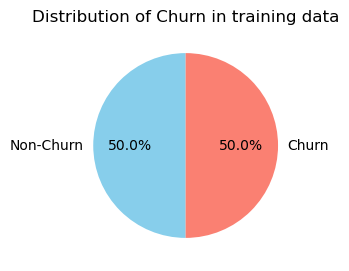

In [53]:
# Count the distribution of churn (True/False)
churn_counts = y_train_smote.value_counts()
plt.figure(figsize=(4, 3))
churn_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    labels=['Non-Churn', 'Churn'],
)
plt.title('Distribution of Churn in training data')
plt.ylabel('')
plt.show()

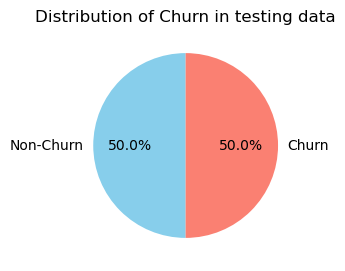

In [54]:
# Count the distribution of churn (True/False)
churn_counts =y_test_smote.value_counts()
plt.figure(figsize=(4, 3))
churn_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    labels=['Non-Churn', 'Churn'],
)
plt.title('Distribution of Churn in testing data')
plt.ylabel('')
plt.show()

- After generating synthetic samples, ENN helps to remove potential noise or outliers introduced during resampling, ensuring that the data used for training is clean and reliable.

In [55]:
#ENN for the smoted data
enn = EditedNearestNeighbours()
X_train_scaled_smote_enn, y_train_smote_enn = enn.fit_resample(X_train_scaled_smote, y_train_smote)
X_test_scaled_smote_enn, y_test_smote_enn=enn.fit_resample(X_test_scaled_smote, y_test_smote)

--> SMOTE and ENN address class imbalance, ensuring that churners are adequately represented in the training data, improving predictive accuracy for both churn and non-churn customers.

# 4. Modeling

### 4.1 DSO1: Analyze key factors influencing churn to enable targeted retention

#### 4.1.1 Principal Component Analysis (PCA)

In [56]:
# Apply PCA with all components (n_components = number of features)
n_components = X_train_scaled_smote_df.shape[1]
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train_scaled_smote_df)

# Create a DataFrame with the PCA results
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

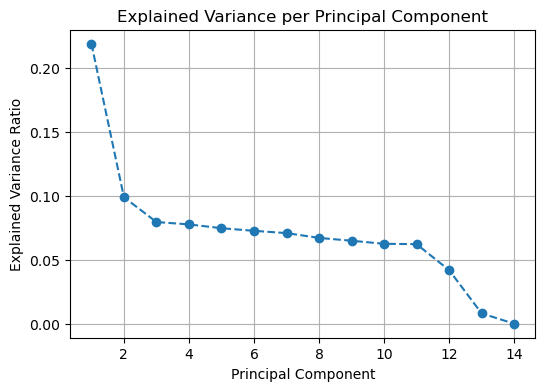

In [57]:
# Plot 1: Explained Variance (Scree Plot)
plt.figure(figsize=(6,4))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Explained Variance Plot
Purpose: The explained variance plot illustrates how much variance each principal component captures, indicating how much information is retained from the original features.

- Analysis:

If the first few components capture most of the variance, it suggests that only a few components are needed to represent most of the data's variability.
A sharp decline in variance after the initial components means the remaining components add little value and may introduce noise, so they can be discarded.
- Example:
If the first 2-3 components explain 90% or more of the variance, the number of features can be reduced significantly while retaining most of the important information, which is the aim of PCA.

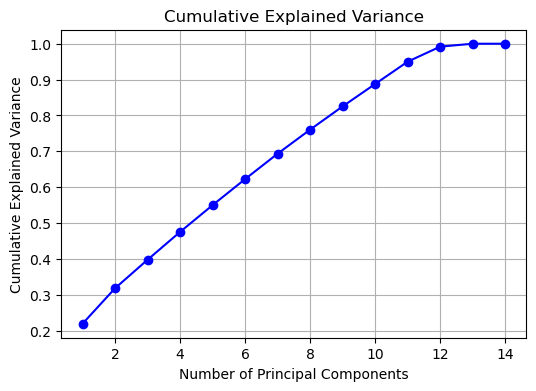

In [58]:
# Plot 2: Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, n_components+1), cumulative_explained_variance, marker='o', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


- Cumulative Explained Variance Plot
Purpose: This plot shows the cumulative variance explained by the first n components, helping to identify how many components are needed to explain a significant portion of the total variance.

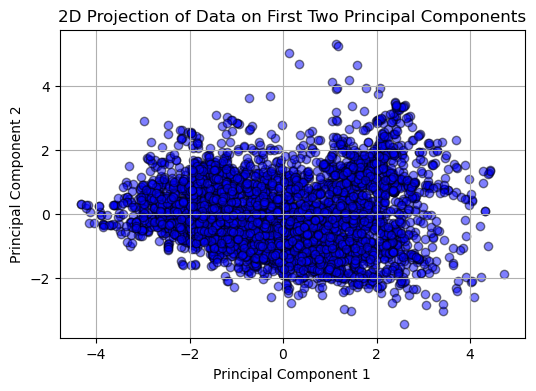

In [59]:
# Plot 3: 2D Projection (if n_components > 1)
if n_components >= 2:
    plt.figure(figsize=(6,4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.5)
    plt.title('2D Projection of Data on First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

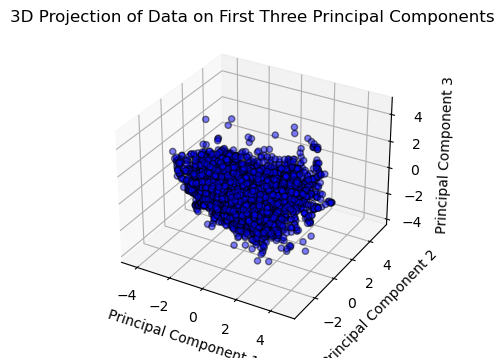

In [60]:

# Plot 4: 3D Projection (if n_components > 2)
if n_components >= 3:
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='blue', edgecolor='k', alpha=0.5)
    ax.set_title('3D Projection of Data on First Three Principal Components')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

- The Principal Component Analysis (PCA) successfully reduced the dimensionality of the dataset while retaining a significant portion of the variance. The first few principal components captured the majority of the variance in the data, suggesting that dimensionality reduction has been effective without losing critical information.

- The cumulative explained variance plot showed that a small number of components could represent most of the original data, which indicates that the dataset is relatively compact and the use of PCA for reducing features is justified. However, while PCA simplified the feature space, it did not directly improve predictive performance for churn prediction in this case. The transformed features (principal components) are less interpretable, which might be a drawback in applications requiring model transparency.

--> PCA successfully reduced the dimensionality of the dataset while retaining most of the variance, improving computational efficiency. However, while it simplified the feature space, PCA did not significantly enhance predictive performance for churn prediction. It remains a useful tool for dimensionality reduction but should be used carefully when interpretability and prediction accuracy are key priorities.

#### 4.1.2 K-means

- K-Means clustering is applied to identify groups (clusters) in the dataset based on features that might indicate different churn behaviors. The goal is to see if there are distinct patterns in the data that can be leveraged for churn prediction.

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

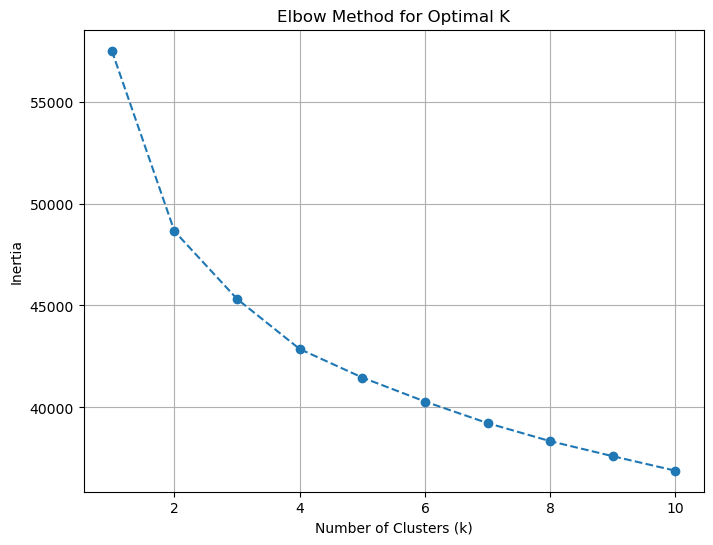

In [61]:
#Determine the optimal number of clusters using the Elbow Method
# List to store the sum of squared distances (inertia) for each k
inertia = []
k_range = range(1, 11)  # Test with k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled_smote_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [62]:
# Copy original data (to prevent modifying the original data)
X_train_copy = X_train_scaled_smote_df.copy()  # Copy feature data
y_train_copy = y_train_smote_df.copy()

#Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_copy)

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

### 4.2 DSO2:predict churn and provide insights for effective retention strategies.

#### 4.2.1 Support Vector Classifier (SVC)

SVC is a powerful model for binary classification

In [63]:
svc_model = SVC(probability=True)
svc_model.fit(X_train_scaled_smote, y_train_smote_df)

SVC(probability=True)

- GridSearchCV is used to tune the penalty parameter C to optimize the model's performance.

In [64]:
#hyperparameters
param_grid_svc= {'C': np.linspace(0.001641949, 464.0812108, 100) }
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    scoring='f1',
    cv=5,
    verbose=1 )
grid_search_svc.fit(X_train_scaled_smote, y_train_smote_df)
svc_model = grid_search_svc.best_estimator_
print("Best Hyperparameters:", grid_search_svc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'C': 23.44000401218182}


#### 4.2.2 Logistic Regression

Logistic regression is a simple and interpretable model used as a baseline. It estimates the probability of a customer churning based on the linear relationship between input features and the target variable.


In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled_smote, y_train_smote_df)

LogisticRegression()

- Hyperparameters such as the regularization parameter C were tuned using GridSearchCV to find the optimal value.

In [66]:
# Hyperparameter
param_grid_lg = {"C": [0.01, 0.1, 1]}
# Grid Search with Cross-Validation
grid_search_lg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lg,
    scoring="f1",
    cv=5,
    verbose=2
)
grid_search_lg.fit(X_train_scaled_smote, y_train_smote_df)
# Best parameters
log_reg = grid_search_lg.best_estimator_
print(f"Best Parameters for Logistic Regression: {grid_search_lg.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ........................................

#### 4.2.3 Random Forest

Random Forest is an ensemble method that works well with both numerical and categorical data. It can capture non-linear relationships and interactions between features, making it more suited for churn prediction.

In [67]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_smote, y_train_smote_df)

RandomForestClassifier(random_state=42)

- Hyperparameters such as max_depth and n_estimators were tuned to ensure optimal performance.

In [68]:
#hyperparameter
param_grid_rf = {
    'max_depth': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'n_estimators': [14, 15, 16, 17, 18, 19, 20]
}
grid_search_rf= GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled_smote, y_train_smote_df)
rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters : {grid_search_rf.best_params_}")

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Parameters : {'max_depth': 20, 'n_estimators': 19}


#### 4.2.4 Gradient Boosting Machine (GBM)

GBM is another ensemble method that builds multiple decision trees sequentially, with each tree correcting the errors of the previous one. It excels at handling complex, non-linear data like churn prediction.

In [69]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train_scaled_smote, y_train_smote_df)

GradientBoostingClassifier()

- Hyperparameters such as max_depth, min_samples_leaf, and n_estimators were tuned using GridSearchCV to find the best model.

In [70]:
# Corrected hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 29],
    'min_samples_leaf': [5, 6, 7, 8, 9, 10],
    'max_features': [None],
    'max_leaf_nodes': [3, 4, 5, 6, 7]
}
# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train_scaled_smote, y_train_smote_df)

# Best model
gbm = grid_search.best_estimator_
print(f"Best Parameters for GBM: {grid_search.best_params_}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.4s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.2s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.4s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.2s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes

[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   2.8s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   2.9s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   3.7s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   3.1s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   3.1s
[CV] END max_de

[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=8; total time=   2.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=8; total time=   2.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=8; total time=   2.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=9; total time=   2.4s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=9; total time=   2.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=9; total time=   2.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=9; total time=   2.2s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=9; total time=   3.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=10; total time=   4.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=3, min_samples_leaf=10; total time=   3.1s
[CV] END

[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=7; total time=   4.1s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=7; total time=   3.6s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=7; total time=   3.4s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=7; total time=   3.4s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=7; total time=   3.4s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   4.3s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   3.2s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   3.4s
[CV] END max_depth=10, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   3.5s
[CV] END m

[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   2.7s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   2.6s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   3.3s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   2.9s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   2.9s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   2.7s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   2.8s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   3.0s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   2.7s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   2.9s
[CV] END m

[CV] END max_depth=15, max_features=None, max_leaf_nodes=6, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=6, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=6, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=6, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   4.6s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   3.7s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   3.7s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   3.6s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   3.8s
[CV] END max_depth=15, max_features=None, max_leaf_nodes=7, min_samples_leaf=6; total time=   4.7s
[CV] E

[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=8; total time=   2.6s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=9; total time=   3.0s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=9; total time=   2.9s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=9; total time=   2.9s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=9; total time=   3.0s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=9; total time=   2.8s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=4, min_samples_leaf=10; total time=   3.0s
[CV] E

[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   3.8s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   3.7s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   3.8s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   4.6s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   3.9s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=9; total time=   4.6s
[CV] END max_depth=20, max_features=None, max_leaf_nodes=7, min_samples_leaf=9; total time=   3.8s
[CV] END m

[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   3.8s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   3.2s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   3.2s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   3.1s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=6; total time=   3.2s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   3.9s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   3.3s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   3.2s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   3.2s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=7; total time=   3.2s
[CV] END m

[CV] END max_depth=25, max_features=None, max_leaf_nodes=7, min_samples_leaf=10; total time=   3.9s
[CV] END max_depth=25, max_features=None, max_leaf_nodes=7, min_samples_leaf=10; total time=   4.0s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.6s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.5s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.5s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.4s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   2.4s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.5s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.2s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   2.4s
[CV] END

[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   3.1s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   3.0s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   3.1s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=9; total time=   3.9s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   4.8s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   4.0s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   4.3s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   4.1s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=5, min_samples_leaf=10; total time=   3.7s
[CV] END max_depth=29, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   5.3s
[CV] 

#### 4.2.5 Neural Network

The Neural Network model uses multiple layers to capture complex relationships in the data. While it has the potential to outperform other models,

In [71]:
nn_model = MLPClassifier(random_state=42,max_iter=1000)
nn_model.fit(X_train_scaled_smote, y_train_smote_df)

MLPClassifier(max_iter=1000, random_state=42)

- It requires careful tuning of hyperparameters like hidden_layer_sizes and activation.

In [72]:
param_grid_nn = {
    'hidden_layer_sizes': [(5,), (6,), (7,), (8,), (9,)],
    'activation': ['relu'],
    'solver': ['adam']
}
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_nn.fit(X_train_scaled_smote, y_train_smote_df)

# Get the best parameters
nn_model = grid_search_nn.best_estimator_
print(f"Best Parameters : {grid_search_nn.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters : {'activation': 'relu', 'hidden_layer_sizes': (9,), 'solver': 'adam'}


#### 4.2.6 AdaBoost

AdaBoost is a boosting algorithm that focuses on improving the performance of weak classifiers by adjusting the weights of misclassified data points. It is effective in reducing bias and can improve predictions over time.

In [73]:
adaboost_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
adaboost_model.fit(X_train_scaled_smote, y_train_smote_df)

AdaBoostClassifier(algorithm='SAMME', random_state=42)

- Hyperparameters such as n_estimators and learning_rate were tuned to ensure optimal performance.


In [74]:
#hyperparameter
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
}
grid_search_ada = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_ada, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_ada.fit(X_train_scaled_smote, y_train_smote_df)
adaboost_model= grid_search_ada.best_estimator_
print(f"Best Parameters: {grid_search_ada.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 500}


#### 4.2.7 XGBoost

XGBoost is an optimized version of gradient boosting that focuses on efficiency and scalability. It is highly effective for structured/tabular data, making it well-suited for churn prediction.

In [75]:
xgb_model =xgb.XGBClassifier()
xgb_model.fit(X_train_scaled_smote, y_train_smote_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

- Similar to GBM, hyperparameters such as n_estimators and learning_rate were tuned using GridSearchCV.

In [76]:
param_grid_xgb = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 10]
}
# Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    verbose=2
)

# Fit Grid Search (use your preprocessed training data)
grid_search_xgb.fit(X_train_scaled_smote, y_train_smote_df)
# Best model and hyperparameters
xgb_model = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_

[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=300; total time=   0.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=300; total time=   0.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=300; total time=   0.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=300; total time=   1.0s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=300; total time=   0.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=   1.5s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=   1.5s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=   1.5s
[CV] END .learning_rate=0.01

[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=500; total time=   1.3s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=500; total time=   1.0s
[CV] END ..learning_rate=0.05, max_depth=9, n_estimators=500; total time=   1.0s
[CV] END ..learning_rate=0.0

[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=700; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=700; total time=   0.9s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.8s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=700; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=700; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=700; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=700; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=700; total time=   0.7s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=   0.7s
[CV] END ..learning_rate=0.3

[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=700; total time=   0.7s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=700; total time=   0.7s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=700; total time=   0.7s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=700; total time=   0.7s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=700; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=10, n_estimators=1000; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=10, n_estimators=1000; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=10, n_estimators=1000; total time=   1.2s
[CV] END .learning_rate=0.3,

### 4.3 DSO3: predict customer churn

#### 4.3.1 Decision Tree

##### 4.3.1.1 Before sampling

In [77]:
dt_model_bs = DecisionTreeClassifier(random_state=42, max_depth=None)
dt_model_bs.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

#####4.3.1.2 After sampling

In [78]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=None)
dt_model.fit(X_train_scaled_smote_enn, y_train_smote_enn)

DecisionTreeClassifier(random_state=42)

#### 4.3.2 Random Forest

##### 4.3.2.1 Before sampling

In [79]:
rf_model_bs = RandomForestClassifier(
    random_state=42,          # For reproducibility
    max_features='sqrt',      # Feature randomness
    bootstrap=True            # Enables bagging
)
rf_model_bs.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

##### 4.3.2.2 After sampling

In [80]:
rf_model = RandomForestClassifier(
    random_state=42,          # For reproducibility
    max_features='sqrt',      # Feature randomness
    bootstrap=True            # Enables bagging
)
rf_model.fit(X_train_scaled_smote_enn, y_train_smote_enn)

RandomForestClassifier(random_state=42)

#### 4.3.3 Cox Proportional Hazard Model

In [81]:
# Prepare data for Cox model
df_cox = X_train.copy()
df_cox['event'] = y_train
df_cox['time'] = df_cox['Account length']
# Select covariates from your work
covariates = [
    'International plan',
    'Usage Score',
    'Customer service calls',
    'Total day charge',
    'State_Category'
]
df_cox = df_cox[['time', 'event'] + covariates]

In [82]:
# Fit the Cox model
cox_model = CoxPHFitter()
cox_model.fit(df_cox, duration_col='time', event_col='event')

<lifelines.CoxPHFitter: fitted with 2666 total observations, 2276 right-censored observations>

# 5. Evaluation

- Accuracy: Logistic Regression shows moderate accuracy, which is typical for a baseline model.
- Precision: The precision is reasonable, indicating that when the model predicts a customer as "non-churn," it is often correct.
- Recall: The recall is lower, meaning the model misses many of the churn customers (false negatives).
- F1-Score: The F1-score reflects the trade-off between precision and recall and shows that Logistic Regression struggles to balance these metrics effectively.

### 5.1 DSO1: Analyze key factors influencing churn to enable targeted retention

#### 5.1.1 Principal Component Analysis (PCA)

In [83]:
# Train a Random Forest model on the PCA-transformed data
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_scaled_smote_df, y_train_smote)

#  Make predictions on the test set
y_pred_pca_rf = rf_model_pca.predict(X_test_scaled_smote)

#  Evaluate the model's performance using a classification report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_pca_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       574
           1       0.98      0.81      0.88       574

    accuracy                           0.89      1148
   macro avg       0.91      0.89      0.89      1148
weighted avg       0.91      0.89      0.89      1148



The PCA-based model achieved 89% accuracy but showed lower recall for churn cases, indicating some misclassification. Improving churn recall through PCA tuning, class weights, or alternative methods is recommended to enhance performance.



#### 5.1.2 K-means

In [84]:
#Get the predicted cluster labels
predicted_labels = kmeans.labels_

#Check the distribution of the clusters and target labels
df_with_clusters = pd.DataFrame(X_train_copy)
df_with_clusters['Cluster'] = predicted_labels
df_with_clusters['Target'] = y_train_copy


# Proportional mapping of clusters to target labels
cluster_to_label = {}

for cluster in range(2):
    # Identify data points in the current cluster
    cluster_indices = (predicted_labels == cluster)
    cluster_labels = y_train_copy[cluster_indices]

    # Assign the most frequent label (proportional)
    label_counts = cluster_labels.value_counts()
    most_common_label = label_counts.idxmax()

    cluster_to_label[cluster] = most_common_label

# Map predicted clusters to target labels based on the mapping
mapped_labels = np.array([cluster_to_label[cluster] for cluster in predicted_labels])

#Evaluate the clustering results
print("Classification Report:")
print(classification_report(y_train_copy, mapped_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      2276
           1       0.57      0.56      0.57      2276

    accuracy                           0.57      4552
   macro avg       0.57      0.57      0.57      4552
weighted avg       0.57      0.57      0.57      4552



**-->** K-Means clustering is not suitable for binary target classification in this case, as it does not effectively capture the relationship between features and target classes, leading to suboptimal performance and low accuracy.

### 5.2 DSO2:predict churn and provide insights for effective retention strategies.

#### 5.2.1 Support Vector Classfier (SVC)

In [85]:
#Make predictions on the test set
y_pred_svc = svc_model.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       574
           1       0.88      0.60      0.71       574

    accuracy                           0.76      1148
   macro avg       0.79      0.76      0.75      1148
weighted avg       0.79      0.76      0.75      1148



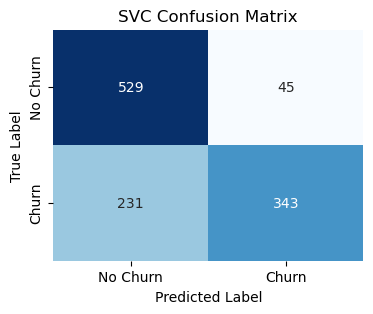

In [86]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_svc))

# Confusion Matrix
cm_svm = confusion_matrix(y_test_smote, y_pred_svc)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> SVC demonstrated moderate accuracy and precision but struggled with recall, meaning it missed several churn predictions. This limits its practicality for churn prediction, where identifying churners is critical.
Conclusion:

--> While SVC can perform well in linearly separable datasets, its limited recall makes it less suitable for imbalanced and complex problems like churn prediction.

#### 5.2.2 Logitic Regression

In [87]:
#Make predictions on the test set
y_pred_lg = log_reg.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       574
           1       0.75      0.70      0.73       574

    accuracy                           0.73      1148
   macro avg       0.74      0.73      0.73      1148
weighted avg       0.74      0.73      0.73      1148



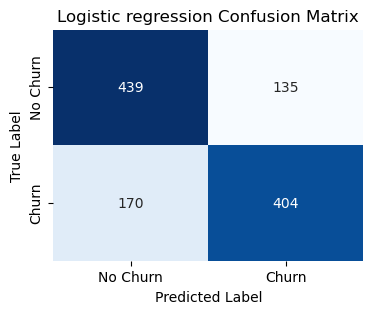

In [88]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_lg))

# Confusion Matrix
cm_lg = confusion_matrix(y_test_smote, y_pred_lg)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Logistic regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Logistic Regression is a simple model that performs well in terms of precision but fails to effectively capture churn (low recall). For churn prediction, where identifying customers who are likely to leave is crucial, low recall is a significant limitation, as it means many churners are being missed.

#### 5.2.3 Random Forest

In [89]:
#Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       574
           1       0.98      0.79      0.87       574

    accuracy                           0.89      1148
   macro avg       0.90      0.89      0.88      1148
weighted avg       0.90      0.89      0.88      1148



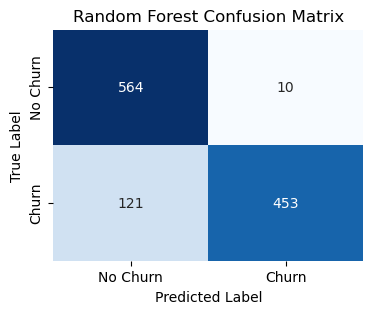

In [90]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_smote, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Random Forest excels in churn prediction by maintaining both high precision and recall. This is crucial for churn prediction, where we need to correctly identify customers likely to churn (high recall) while avoiding false positives (high precision). It strikes a balance between these two, making it an excellent model for this task.

#### 5.2.4 Gradient Boosting Machine (GBM)

In [91]:
#Make predictions on the test set
y_pred_gbm = gbm.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       574
           1       0.99      0.90      0.94       574

    accuracy                           0.94      1148
   macro avg       0.95      0.94      0.94      1148
weighted avg       0.95      0.94      0.94      1148



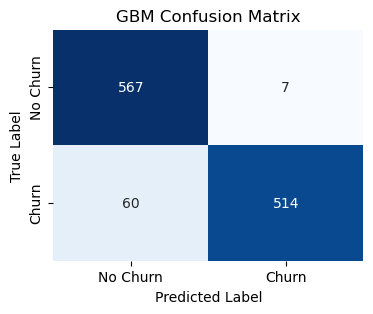

In [92]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_gbm))

# Confusion Matrix
cm_gbm = confusion_matrix(y_test_smote, y_pred_gbm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("GBM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> GBM is the best model for churn prediction. Its high recall ensures that the majority of churners are detected, which is essential in a business setting. Its high precision means that it doesn't make many false positive predictions (non-churn customers predicted as churn). The F1-score indicates that GBM strikes an excellent balance between the two, making it the most reliable model for this task.

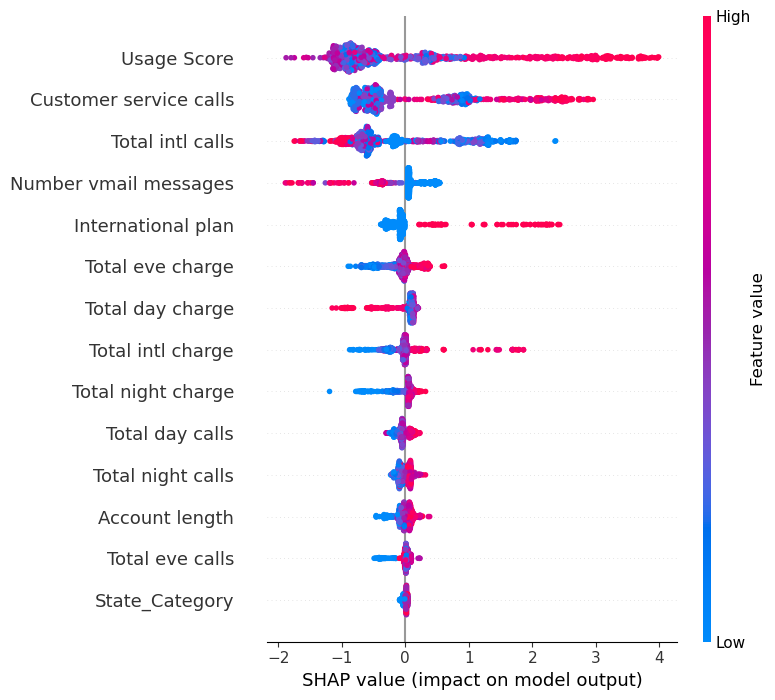

In [93]:
import shap

# Create a SHAP explainer for the  model
explainer1 = shap.Explainer(gbm, X_train_scaled_smote)
shap_values = explainer1(X_test_scaled_smote)

# Summary plot to show the contribution of each feature
shap.summary_plot(shap_values, X_test_scaled_smote)

# Force plot for a specific prediction
shap.initjs()
i = 0  # Index of the instance you want to explain
shap.force_plot(explainer1.expected_value, shap_values[i].values, X_test_scaled_smote.iloc[i])


 **Key Features Influencing Churn**
- Customer service calls: This is the most impactful feature. A higher number of customer service calls (in red, indicating high feature value) increases the likelihood of churn, likely indicating customer dissatisfaction.
- Usage Score: This feature also significantly impacts the churn prediction. Higher usage scores positively influence the churn likelihood.
- Total day charge and Total evening charge: These two features show similar behavior—higher values (in red) increase the SHAP value, meaning customers with higher day and evening charges are more likely to churn.
- International Plan: This binary feature indicates whether a customer has an international plan. Its effect is split, but customers without the plan (low values in blue) seem to contribute more to churn.
- Number of voicemail messages: Lower values (in blue) decrease churn likelihood, suggesting customers using voicemail features are less likely to churn.
- Other features like Total day calls, Total intl charge, and Account length have comparatively smaller impacts on the prediction.

- Features such as Customer service calls, Usage Score, and Total day charge have more pronounced positive effects.

--> The SHAP analysis shows that Customer Service Calls and Usage Score are the top predictors of churn, indicating dissatisfaction and high usage as key drivers. High charges for day and evening usage further increase churn likelihood, while low voicemail activity and lack of an international plan also contribute. Improving customer service and addressing high-usage concerns can help reduce churn.

#### 5.2.5 Neural Network

In [94]:
#Make predictions on the test set
y_pred_nn =nn_model.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       574
           1       0.89      0.74      0.81       574

    accuracy                           0.82      1148
   macro avg       0.83      0.82      0.82      1148
weighted avg       0.83      0.82      0.82      1148



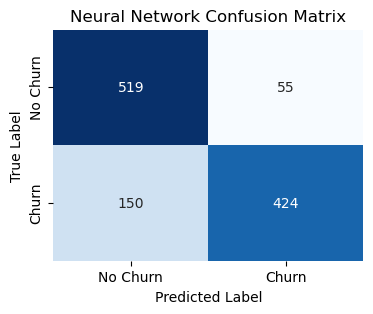

In [95]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test_smote, y_pred_nn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Neural Networks are powerful for capturing complex patterns, but they underperform in churn prediction compared to Random Forest and GBM. Although recall is decent, the slightly lower recall compared to GBM means that some churners are being missed. Additionally, neural networks require significant tuning and computational power to perform well.

#### 5.2.6 AdaBoost

In [96]:
#Make predictions on the test set
y_pred_ada =adaboost_model.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       574
           1       0.92      0.88      0.90       574

    accuracy                           0.90      1148
   macro avg       0.91      0.90      0.90      1148
weighted avg       0.91      0.90      0.90      1148



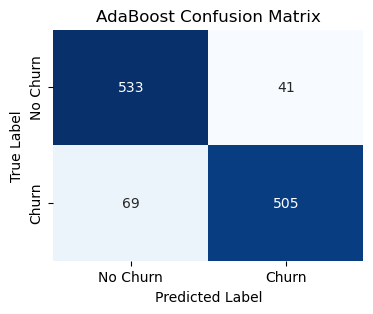

In [97]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_ada))

# Confusion Matrix
cm_ada = confusion_matrix(y_test_smote, y_pred_ada)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> AdaBoost provides moderate results but has lower recall, which is a significant limitation for churn prediction. It misses churners and therefore isn't the best model for this task. Its moderate performance makes it less reliable for churn prediction compared to Random Forest and GBM.

#### 5.2.7 XGBoost

In [98]:
#Make predictions on the test set
y_pred_xgb =xgb_model.predict(X_test_scaled_smote)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       574
           1       0.98      0.86      0.92       574

    accuracy                           0.92      1148
   macro avg       0.93      0.92      0.92      1148
weighted avg       0.93      0.92      0.92      1148



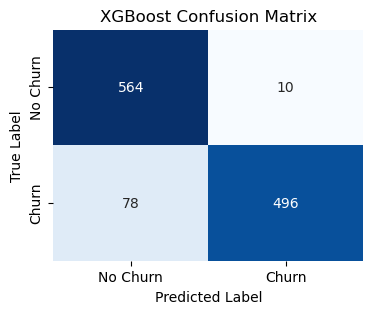

In [99]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_smote, y_pred_xgb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> XGBoost is a strong performer for churn prediction. While its recall is slightly lower than GBM, it still provides excellent overall performance. Its high precision ensures that the churn predictions are reliable, and it’s a good alternative to GBM when computational efficiency is important.

#### 5.2.8 Roc and Auc

In [100]:
#SVC
fpr1, tpr1, threshold1 = roc_curve(y_test_smote, y_pred_svc)
roc_auc1 = auc(fpr1, tpr1)
#Logistic Regression
fpr2, tpr2, threshold2 = roc_curve(y_test_smote, y_pred_lg)
roc_auc2 = auc(fpr2, tpr2)
#Random Forest
fpr3, tpr3, thresholds3 = roc_curve(y_test_smote, y_pred_rf)
roc_auc3 =  auc(fpr3, tpr3)
#Gradient Boosting Machine (GBM)
fpr4, tpr4, thresholds4 = roc_curve(y_test_smote, y_pred_gbm)
roc_auc4 = auc(fpr4, tpr4)
#Neural Network
fpr5, tpr5, thresholds5 = roc_curve(y_test_smote, y_pred_nn)
roc_auc5 = auc(fpr5, tpr5)
#AdaBoost
fpr6, tpr6, thresholds6 = roc_curve(y_test_smote, y_pred_ada)
roc_auc6 = auc(fpr6, tpr6)
#XGBoost
fpr7, tpr7, thresholds7 = roc_curve(y_test_smote, y_pred_xgb)
roc_auc7 = auc(fpr7, tpr7)

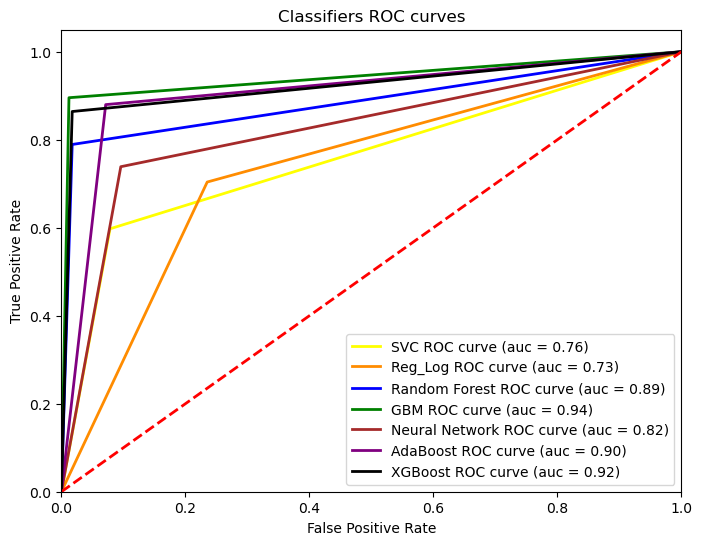

In [101]:
# Roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='SVC ROC curve (auc = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='Reg_Log ROC curve (auc = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='Random Forest ROC curve (auc = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='green', lw=2, label='GBM ROC curve (auc = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='brown', lw=2, label='Neural Network ROC curve (auc = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='purple', lw=2, label='AdaBoost ROC curve (auc = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='black', lw=2, label='XGBoost ROC curve (auc = %0.2f)'% roc_auc7)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

- GBM achieved the highest ROC-AUC, indicating its superior ability to distinguish between churn and non-churn customers. Precision-recall curves further confirmed its balanced performance.

-->> ROC-AUC and precision-recall metrics reinforce GBM as the most reliable model for churn prediction, with a strong ability to identify churners while minimizing false positives.

#### 5.2.9 Summary

In [102]:
# Initialize empty DataFrame
metrics_df = pd.DataFrame(columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-score", "PR-score"
])
# Function to calculate PR-score
def calculate_pr_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    return pr_auc

# metrics
def add_model_metrics(df, model_name, y_true, y_pred, y_proba):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-score": roc_auc_score(y_true, y_proba),
        "PR-score": calculate_pr_score(y_true, y_proba)
    }
    return pd.concat([df, pd.DataFrame([metrics])], ignore_index=True)

models = {"SVC":svc_model,
          "Logistic Regression": log_reg,
          "Random Forest": rf_model,
          "GBM": gbm,
          "Neural Network": nn_model,
          "AdaBoost": adaboost_model,
          "XGBoost": xgb_model
        }

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled_smote)
    y_proba = model.predict_proba(X_test_scaled_smote)[:, 1]
    metrics_df = add_model_metrics(metrics_df, model_name, y_test_smote, y_pred, y_proba)

C:\Users\salma\AppData\Local\Temp\ipykernel_11732\1814566717.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([metrics])], ignore_index=True)


In [103]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-score,PR-score
0,SVC,0.759582,0.884021,0.597561,0.713098,0.833469,0.864568
1,Logistic Regression,0.734321,0.749536,0.703833,0.725966,0.803494,0.782370
2,Random Forest,0.885889,0.978402,0.789199,0.873674,0.960905,0.969228
3,GBM,0.941638,0.986564,0.895470,0.938813,0.977042,0.983734
4,Neural Network,0.821429,0.885177,0.738676,0.805318,0.874537,0.909676
5,AdaBoost,0.904181,0.924908,0.879791,0.901786,0.956877,0.961374
6,XGBoost,0.923345,0.980237,0.864111,0.918519,0.971236,0.978921


**-->** Gradient Boosting Machine (GBM) achieves the best performance across all metrics



### 5.3 DSO3: predict customer churn

#### 5.3.1 Decision Tree

##### 5.3.1.1 Before sampling

In [104]:
#Make predictions on the test set
y_pred_dt_bs = dt_model_bs.predict(X_test_scaled)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       574
           1       0.74      0.69      0.71        93

    accuracy                           0.92       667
   macro avg       0.84      0.82      0.83       667
weighted avg       0.92      0.92      0.92       667



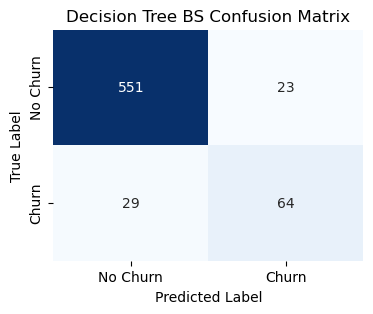

In [105]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_bs))

# Confusion Matrix
cm_dt_bs = confusion_matrix(y_test, y_pred_dt_bs)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_dt_bs, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Decision Tree BS Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Performance: The decision tree performed decently but was biased toward predicting the majority class (non-churn). It identified general trends in the data but struggled with imbalanced data.

##### 5.3.1.1 After sampling

In [106]:
#Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled_smote_enn)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       574
           1       0.88      0.78      0.83       558

    accuracy                           0.84      1132
   macro avg       0.84      0.84      0.84      1132
weighted avg       0.84      0.84      0.84      1132



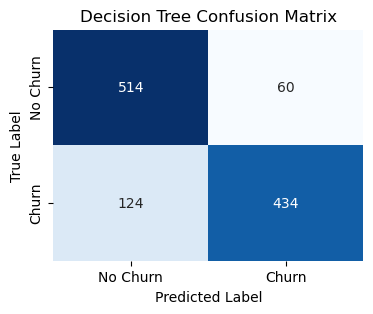

In [107]:
print("\nClassification Report:")
print(classification_report(y_test_smote_enn, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test_smote_enn, y_pred_dt)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Performance: After balancing the classes, the decision tree shows an improved recall, indicating that it can now identify churners more effectively. However, the precision still needs attention, as it may incorrectly classify some non-churners as churn.

#### 5.3.2 Random Forest

##### 5.3.2.1 Before Sampling

In [108]:
#Make predictions on the test set
y_pred_rf_bs = rf_model_bs.predict(X_test_scaled)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       574
           1       0.97      0.70      0.81        93

    accuracy                           0.96       667
   macro avg       0.96      0.85      0.89       667
weighted avg       0.96      0.96      0.95       667



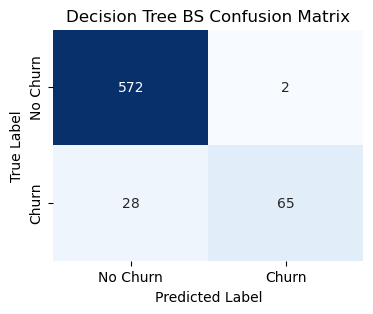

In [109]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_bs))

# Confusion Matrix
cm_rf_bs = confusion_matrix(y_test, y_pred_rf_bs)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf_bs, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Decision Tree BS Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Performance: Random Forest performs significantly better than a single decision tree, with a more balanced precision and recall. It offers better generalization by averaging the predictions of multiple decision trees.

##### 5.3.2.2 After Sampling

In [110]:
#Make predictions on the test set
y_pred_rf= rf_model.predict(X_test_scaled_smote_enn)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       574
           1       0.98      0.80      0.88       558

    accuracy                           0.89      1132
   macro avg       0.91      0.89      0.89      1132
weighted avg       0.91      0.89      0.89      1132



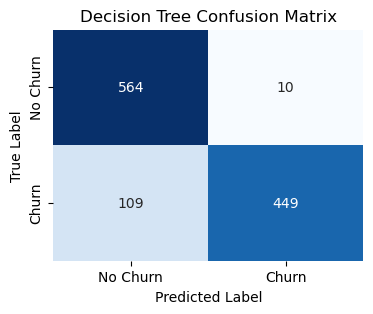

In [111]:
print("\nClassification Report:")
print(classification_report(y_test_smote_enn, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_smote_enn, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

--> Performance: After applying SMOTE and ENN, Random Forest performs excellently, with high recall, meaning it captures a majority of the churners. The precision remains balanced, indicating that the model correctly classifies churners without misclassifying too many non-churners.

#### 5.3.3 Cox Proportional Hazard Model

- The Cox Proportional Hazard model is a survival analysis technique used to predict the timing of an event (churn) based on customer characteristics.

In [112]:
cox_summary = cox_model.summary[['coef', 'exp(coef)', 'p']]
cox_summary = cox_summary.rename(columns={'exp(coef)': 'Hazard Ratio', 'p': 'P-Value'})
cox_summary

,coef,Hazard Ratio,P-Value
covariate,,,
International plan,1.181157,3.258141,9.271989e-26
Usage Score,0.262550,1.300242,2.704384e-07
Customer service calls,0.265725,1.304376,8.083263e-23
Total day charge,-0.085915,0.917672,1.299029e-03
State_Category,0.421205,1.523797,6.567177e-10


In [113]:
predicted_survival = cox_model.predict_survival_function(X_test)
last_time_point = predicted_survival.index.max()
predicted_at_time_t = predicted_survival.loc[last_time_point].values
comparison_df = pd.DataFrame({
    'Customer': X_test.index,
    'Predicted_Survival_Probability': predicted_at_time_t,
    'Actual_Event': y_test.values
})
comparison_df

,Customer,Predicted_Survival_Probability,Actual_Event
0,438,0.049034,0
1,2674,0.455540,0
2,1345,0.335916,0
3,1957,0.549966,0
4,2148,0.675416,0
...,...,...,...
662,2577,0.668032,0
663,2763,0.517061,0
664,3069,0.360885,1
665,1468,0.766456,0


In [114]:
c_index = concordance_index(y_test, predicted_at_time_t)
print(f"C-Index: {c_index}")

C-Index: 0.20017983589974148


--> While the Cox model provides valuable insights into the risk factors for churn, it focuses on the timing of churn events rather than binary classification. It offers important information about customer survival and churn risks but is not as effective for directly predicting churn in a classification setting.

# 6. Deployment

joblib.dump(gbm, 'customer_churn_gbm_model.pkl')

In [115]:
# Save the model to a .pkl file
joblib.dump(gbm, 'customer_churn_gbm_model.pkl')


['customer_churn_gbm_model.pkl']

In [116]:
# Download the file to your local machine
files.download('customer_churn_gbm_model.pkl')

NameError: name 'files' is not defined

In [ ]:
from PIL import Image


# Open the image
img1 = Image.open('/content/form.jpg')

# Get the size of the image
width, height = img1.size

# Display the image using its original resolution
plt.figure(figsize=(width / 100, height / 100))  # Convert pixels to inches (assuming 100 dpi)
plt.imshow(img1)
plt.axis('off')  # Turn off axes
plt.show()

In [ ]:
###### from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = Image.open('/content/result.jpg')

# Get the size of the image
width, height = img.size

# Display the image using its original resolution
plt.figure(figsize=(width / 100, height / 100))  # Convert pixels to inches (assuming 100 dpi)
plt.imshow(img)
plt.axis('off')  # Turn off axes
plt.show()